# Analyse des dommages et des tirs en Isère
Auteur : Daniel Thonon

In [1]:
import datetime

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import seaborn.objects as so
from datetime import datetime, date, time, timezone

# Apply the default theme
sns.set_theme()

In [31]:
# data_url = "https://raw.githubusercontent.com/dthonon/pna_loup_suivi/main/data/"
data_url = "../data/"
# Lecture des départements
constats = pd.read_csv(
    data_url + "bilan_constat_loup_38.csv",
    sep=";",
    header=0,
    names=[
        "Commune",
        "Cercle",
        "Secteur",
        "Lieu-dit",
        "Date attaque",
        "Num semaine",
        "Animaux concernés",
        "Victimes constatées",
        "Taille troupeau ou lot",
        "Conclusion expertise",
        "Indemnisation",
        "Protocole",
        "Num AP tir",
    ],
    usecols=[
        "Commune",
        "Cercle",
        "Secteur",
        "Lieu-dit",
        "Date attaque",
        "Animaux concernés",
        "Victimes constatées",
        "Taille troupeau ou lot",
        "Conclusion expertise",
        "Indemnisation",
    ],
    parse_dates=["Date attaque"],
    dayfirst=True,
)
constats["Année"] = pd.to_datetime(constats["Date attaque"]).dt.year.astype("Int64")
constats_o = constats.query("Indemnisation == 'Oui'")
constats

,Commune,Cercle,Secteur,Lieu-dit,Date attaque,Animaux concernés,Victimes constatées,Taille troupeau ou lot,Conclusion expertise,Indemnisation,Année
0,VATILIEU,2,Bas Grésivaudan,Charbonnière,2017-04-14,Ovin,8,40.0,Loup,Oui,2017
1,VATILIEU,2,Bas Grésivaudan,Charbonnière,2017-04-16,Ovin,7,40.0,Loup,Oui,2017
2,VATILIEU,2,Bas Grésivaudan,Charbonnière,2017-04-17,Ovin,2,40.0,Loup,Oui,2017
3,VATILIEU,2,Bas Grésivaudan,Charbonnière,2017-05-04,Ovin,3,40.0,Loup,Oui,2017
4,VATILIEU,1,Bas Grésivaudan,Charbonnière,2017-05-17,Ovin,1,5.0,Loup,Oui,2017
...,...,...,...,...,...,...,...,...,...,...,...
2716,CHIRENS,2,Voironnais,NaN,2024-10-24,Veau,1,10.0,Indéterminé,Oui,2024
2717,CHARNÈCLES,2,Voironnais,Mangnely,2024-10-28,Bovin,1,7.0,Loup non exclu,Oui,2024
2718,CHARNÈCLES,2,Voironnais,NaN,2024-11-04,Bovin,1,10.0,Indéterminé,Oui,2024
2719,COUBLEVIE,2,Voironnais,NaN,2024-11-09,Bovin,1,40.0,Indéterminé,Oui,2024


## Evolution des statuts d'indemnisation

In [4]:
pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Conclusion expertise",
    columns="Année",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)

Année,2017,2018,2019,2020,2021,2022,2023,2024,Total
Conclusion expertise,,,,,,,,,
Aucun,1,7,0,0,0,0,0,0,8
Canidé,0,15,0,0,0,0,0,0,15
Charognard,6,9,4,0,1,0,8,1,29
Chien,5,5,1,0,0,3,0,22,36
Consommation post mortem,1,0,0,0,0,0,0,0,1
Grand canidé,1,0,0,0,0,0,0,0,1
Indéterminé,7,50,86,67,273,262,210,133,1088
Instruction,1,0,0,0,0,0,0,0,1
Loup,690,660,0,0,0,0,0,0,1350


In [5]:
pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Conclusion expertise",
    columns="Année",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)

Année,2017,2018,2019,2020,2021,2022,2023,2024,Total
Conclusion expertise,,,,,,,,,
Aucun,0,7,0,0,0,0,0,0,7
Canidé,0,13,0,0,0,0,0,0,13
Indéterminé,2,21,0,43,230,213,146,114,769
Loup,637,659,0,0,0,0,0,0,1296
Loup non exclu,0,0,128,183,576,602,124,439,2052
Loup typé,0,0,926,964,157,190,690,39,2966
Lynx,0,0,1,0,0,0,0,1,2
Total,639,700,1055,1190,963,1005,960,593,7105


In [6]:
pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Indemnisation",
    columns="Année",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)

Année,2017,2018,2019,2020,2021,2022,2023,2024,Total
Indemnisation,,,,,,,,,
Attente transmission constat,0,0,0,0,3,4,0,1,8
En cours d'instruction,53,0,72,1,0,0,0,0,126
Non - loup exclu,17,23,34,16,18,12,27,26,173
Non indemnisable,6,31,7,56,49,85,78,33,345
Oui,639,700,1055,1190,963,1005,960,593,7105
Total,715,754,1168,1263,1033,1106,1065,653,7757


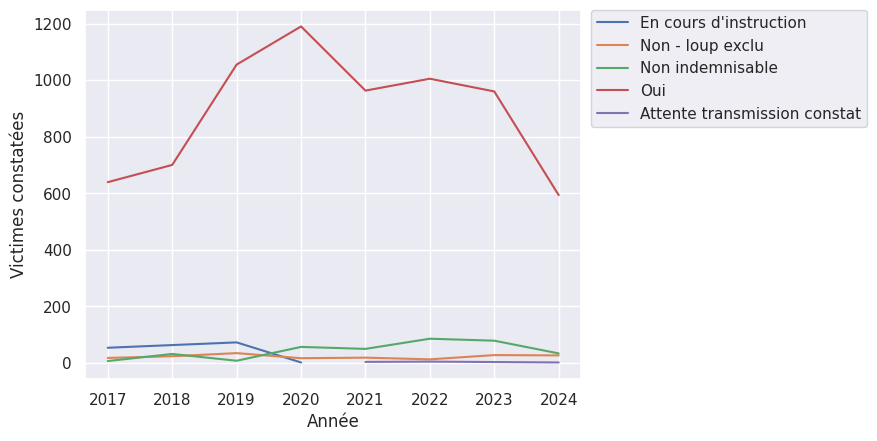

In [7]:
par_indemnisation_l = constats.groupby(["Année", "Indemnisation"]).sum(
    numeric_only=True
)
sns.lineplot(
    data=par_indemnisation_l, x="Année", y="Victimes constatées", hue="Indemnisation"
)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

Année,2024
Indemnisation,
Attente transmission constat,1
En cours d'instruction,0
Non - loup exclu,26
Non indemnisable,33
Oui,593


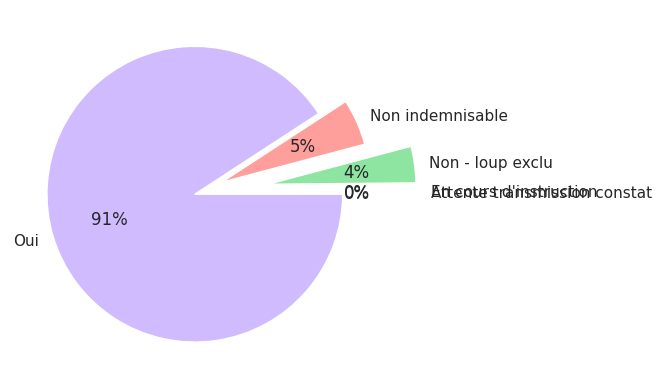

In [8]:
par_indemnisation = pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Indemnisation",
    columns="Année",
    aggfunc="sum",
    fill_value=0,
)
data = list(par_indemnisation[[2024]].values.flat)
labels = par_indemnisation[[2024]].index.values
colors = sns.color_palette("pastel")[0:7]
explode = (0.5, 0.5, 0.5, 0.2, 0)
plt.pie(
    data,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct="%1.0f%%",
    labeldistance=1.1,
)
par_indemnisation[[2024]]

## Evolution par type d'animal de rente prédaté

In [9]:
par_animal = pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Animaux concernés",
    columns="Année",
    aggfunc="sum",
    fill_value=0,
    # margins=True,
    # margins_name="Total"
)
par_animal

Année,2017,2018,2019,2020,2021,2022,2023,2024
Animaux concernés,,,,,,,,
Anon naissant,1,0,0,0,0,0,0,0
Autre,0,0,0,3,0,2,1,1
Bovin,4,17,17,28,13,26,50,53
Canin,0,1,0,4,2,3,8,2
Caprin,4,4,14,33,46,40,14,58
Equin,0,2,3,0,1,2,1,8
Ovin,622,667,1001,1107,854,888,850,430
Veau,4,0,11,8,33,29,18,33
Veau naissant,4,9,9,7,14,15,17,6


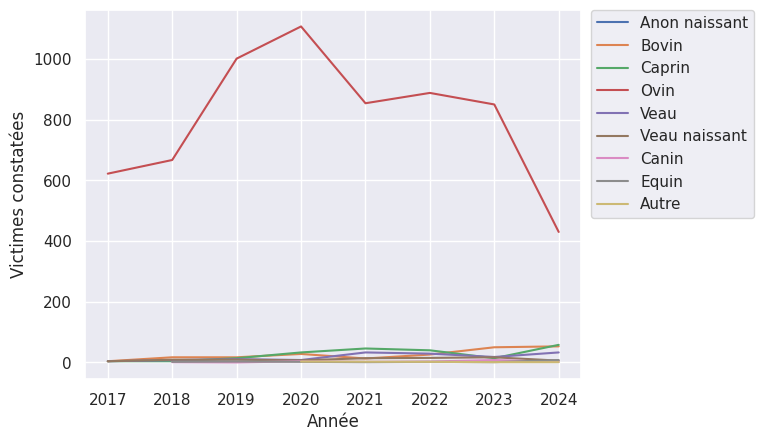

In [10]:
par_animal_l = constats_o.groupby(["Année", "Animaux concernés"]).sum(numeric_only=True)
sns.lineplot(
    data=par_animal_l, x="Année", y="Victimes constatées", hue="Animaux concernés"
)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

## Evolution par secteur

Le tableau suivant résume les dommages indemnisés par secteur.

In [11]:
sorted(constats.Secteur.unique())

['Balmes Viennoises',
 'Bas Drac',
 'Bas Grésivaudan',
 'Beaumont',
 'Belledonne Centre',
 'Belledonne Nord',
 'Belledonne Sud',
 'Bièvre',
 'Chambarans',
 'Chartreuse',
 "Cluses de l'Isère",
 'Collines Viennoises',
 'Connex',
 'Emparis',
 'Grand Armet',
 'Grandes Rousses',
 'Gresse',
 'Haut Grésivaudan',
 "Obiou - Plateau d'Ambel",
 "Plaine de Bourg d'Oisans",
 'Plateau Matheysin',
 'Plateau de Bonnevaux',
 "Plateau de l'Île Crémieu",
 'Royans',
 'Senepy',
 'Tabor',
 'Tabor - Grand Serre',
 'Taillefer',
 'Terres Froides',
 'Terres Froides Méridionales',
 'Terres Froides Occidentales',
 'Terres Froides Septentrionales',
 'Trièves Centre Nord',
 'Trièves Ouest',
 'Trièves Sud',
 'Trièves Sud Ouest',
 'Valbonnais',
 'Valdaine',
 'Valjouffrey',
 'Vallée du Liers et Plateau du Blanchet',
 'Vallée du Rhône entre Vienne et Tournon',
 'Vercors 4 Montagnes',
 'Vercors Balcons Est',
 'Vercors Hauts Plateaux',
 'Vercors Nord',
 'Voironnais',
 'Vénéon']

In [12]:
par_secteur = pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Secteur",
    columns="Année",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
par_secteur

Année,2017,2018,2019,2020,2021,2022,2023,2024,Total
Secteur,,,,,,,,,
Balmes Viennoises,0,0,0,0,0,0,3,2,5
Bas Drac,9,0,0,9,0,2,1,4,25
Bas Grésivaudan,21,1,5,43,3,17,3,15,108
Beaumont,5,16,18,35,3,29,40,21,167
Belledonne Centre,53,22,38,51,46,45,26,55,336
Belledonne Nord,20,41,18,20,15,23,20,11,168
Belledonne Sud,32,17,25,18,39,99,58,45,333
Bièvre,1,0,1,4,8,9,7,3,33
Chambarans,0,5,0,0,4,57,39,21,126


In [13]:
par_secteur = pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Secteur",
    columns="Année",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
par_secteur

Année,2017,2018,2019,2020,2021,2022,2023,2024,Total
Secteur,,,,,,,,,
Balmes Viennoises,0,0,0,0,0,0,2,1,3
Bas Drac,9,0,0,5,0,1,1,4,20
Bas Grésivaudan,21,1,5,37,2,3,1,0,70
Beaumont,0,14,18,35,3,27,39,21,157
Belledonne Centre,49,18,34,43,45,42,26,55,312
Belledonne Nord,18,41,18,15,14,23,19,11,159
Belledonne Sud,28,15,22,18,36,86,49,31,285
Bièvre,0,0,0,1,8,9,4,1,23
Chambarans,0,2,0,0,3,49,22,20,96


In [14]:
par_secteur = pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Secteur",
    columns="Année",
    aggfunc="count",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
par_secteur

Année,2017,2018,2019,2020,2021,2022,2023,2024,Total
Secteur,,,,,,,,,
Balmes Viennoises,0,0,0,0,0,0,3,2,5
Bas Drac,1,0,0,6,0,2,1,4,14
Bas Grésivaudan,5,1,3,9,3,5,3,1,30
Beaumont,3,8,11,8,2,11,22,12,77
Belledonne Centre,19,16,21,25,26,20,15,19,161
Belledonne Nord,5,10,9,10,11,9,9,9,72
Belledonne Sud,11,15,13,14,23,39,32,14,161
Bièvre,1,0,1,4,7,5,7,3,28
Chambarans,0,4,0,0,4,28,24,12,72


In [15]:
par_secteur = pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Secteur",
    columns="Année",
    aggfunc="count",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
par_secteur

Année,2017,2018,2019,2020,2021,2022,2023,2024,Total
Secteur,,,,,,,,,
Balmes Viennoises,0,0,0,0,0,0,2,1,3
Bas Drac,1,0,0,3,0,1,1,4,10
Bas Grésivaudan,5,1,3,6,2,1,1,0,19
Beaumont,0,6,11,8,2,9,21,12,69
Belledonne Centre,18,11,18,20,25,18,15,19,144
Belledonne Nord,3,10,9,7,10,9,8,9,65
Belledonne Sud,7,13,10,14,20,32,26,7,129
Bièvre,0,0,0,1,7,5,4,1,18
Chambarans,0,1,0,0,3,22,14,11,51


## Evolution par commune

In [16]:
par_commune = pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Commune",
    columns="Année",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
pd.set_option("display.max_rows", 500)
par_commune

Année,2017,2018,2019,2020,2021,2022,2023,2024,Total
Commune,,,,,,,,,
ALLEMOND,20,2,1,12,5,4,0,2,46
ALLEVARD,17,21,6,1,1,0,0,4,50
AURIS,9,0,3,49,4,5,18,0,88
AUTRANS-MÉAUDRE EN VERCORS,2,0,0,0,3,0,0,0,5
AVIGNONET,6,0,0,0,0,0,0,0,6
BESSE,26,2,22,13,31,19,19,11,143
BESSINS,0,0,0,0,0,4,0,1,5
BIOL,0,0,0,0,3,0,0,0,3
BOSSIEU,0,0,0,0,8,10,1,0,19


## Pression de prédation

In [17]:
# gis_dir = "/home/daniel/Data/SIG/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2021-11-16/ADE_3-1_SHP_LAMB93_FR/"
gis_url = "https://data.geopf.fr/wfs"
gis_layer = "ADMINEXPRESS-COG.LATEST:commune"
params = dict(
    service="WFS",
    version="2.0.0",
    request="GetFeature",
    typeName=gis_layer,
    outputFormat="json",
    cql_filter="insee_dep=38",
)
r = requests.Request("GET", gis_url, params=params).prepare()

communes = gpd.read_file(r.url)
# departements = gpd.read_file(gis_dir + "DEPARTEMENT.shp")
# communes = gpd.read_file(gis_dir + "COMMUNE.shp")

In [18]:
communes_38 = (
    communes[["nom_m", "geometry"]]
    .rename(columns={"nom_m": "Commune"})
    .set_index("Commune")
)

In [19]:
par_commune_l = constats_o.groupby(["Année", "Commune"]).sum(numeric_only=True)

par_commune_l_2017 = (
    par_commune_l.query("Année == 2017")
    .reset_index(inplace=False)
    .set_index("Commune")
    .drop(columns="Année")
)
par_commune_l_2017 = communes_38.merge(
    par_commune_l_2017, left_index=True, right_index=True, how="outer"
)
par_commune_l_2018 = (
    par_commune_l.query("Année == 2018")
    .reset_index(inplace=False)
    .set_index("Commune")
    .drop(columns="Année")
)
par_commune_l_2018 = communes_38.merge(
    par_commune_l_2018, left_index=True, right_index=True, how="outer"
)
par_commune_l_2019 = (
    par_commune_l.query("Année == 2019")
    .reset_index(inplace=False)
    .set_index("Commune")
    .drop(columns="Année")
)
par_commune_l_2019 = communes_38.merge(
    par_commune_l_2019, left_index=True, right_index=True, how="outer"
)
par_commune_l_2020 = (
    par_commune_l.query("Année == 2020")
    .reset_index(inplace=False)
    .set_index("Commune")
    .drop(columns="Année")
)
par_commune_l_2020 = communes_38.merge(
    par_commune_l_2020, left_index=True, right_index=True, how="outer"
)
par_commune_l_2021 = (
    par_commune_l.query("Année == 2021")
    .reset_index(inplace=False)
    .set_index("Commune")
    .drop(columns="Année")
)
par_commune_l_2021 = communes_38.merge(
    par_commune_l_2021, left_index=True, right_index=True, how="outer"
)
par_commune_l_2022 = (
    par_commune_l.query("Année == 2022")
    .reset_index(inplace=False)
    .set_index("Commune")
    .drop(columns="Année")
)
par_commune_l_2022 = communes_38.merge(
    par_commune_l_2022, left_index=True, right_index=True, how="outer"
)
par_commune_l_2023 = (
    par_commune_l.query("Année == 2023")
    .reset_index(inplace=False)
    .set_index("Commune")
    .drop(columns="Année")
)
par_commune_l_2023 = communes_38.merge(
    par_commune_l_2023, left_index=True, right_index=True, how="outer"
)
par_commune_l_2024 = (
    par_commune_l.query("Année == 2024")
    .reset_index(inplace=False)
    .set_index("Commune")
    .drop(columns="Année")
)
par_commune_l_2024 = communes_38.merge(
    par_commune_l_2024, left_index=True, right_index=True, how="outer"
)

<Axes: title={'center': '2024'}>

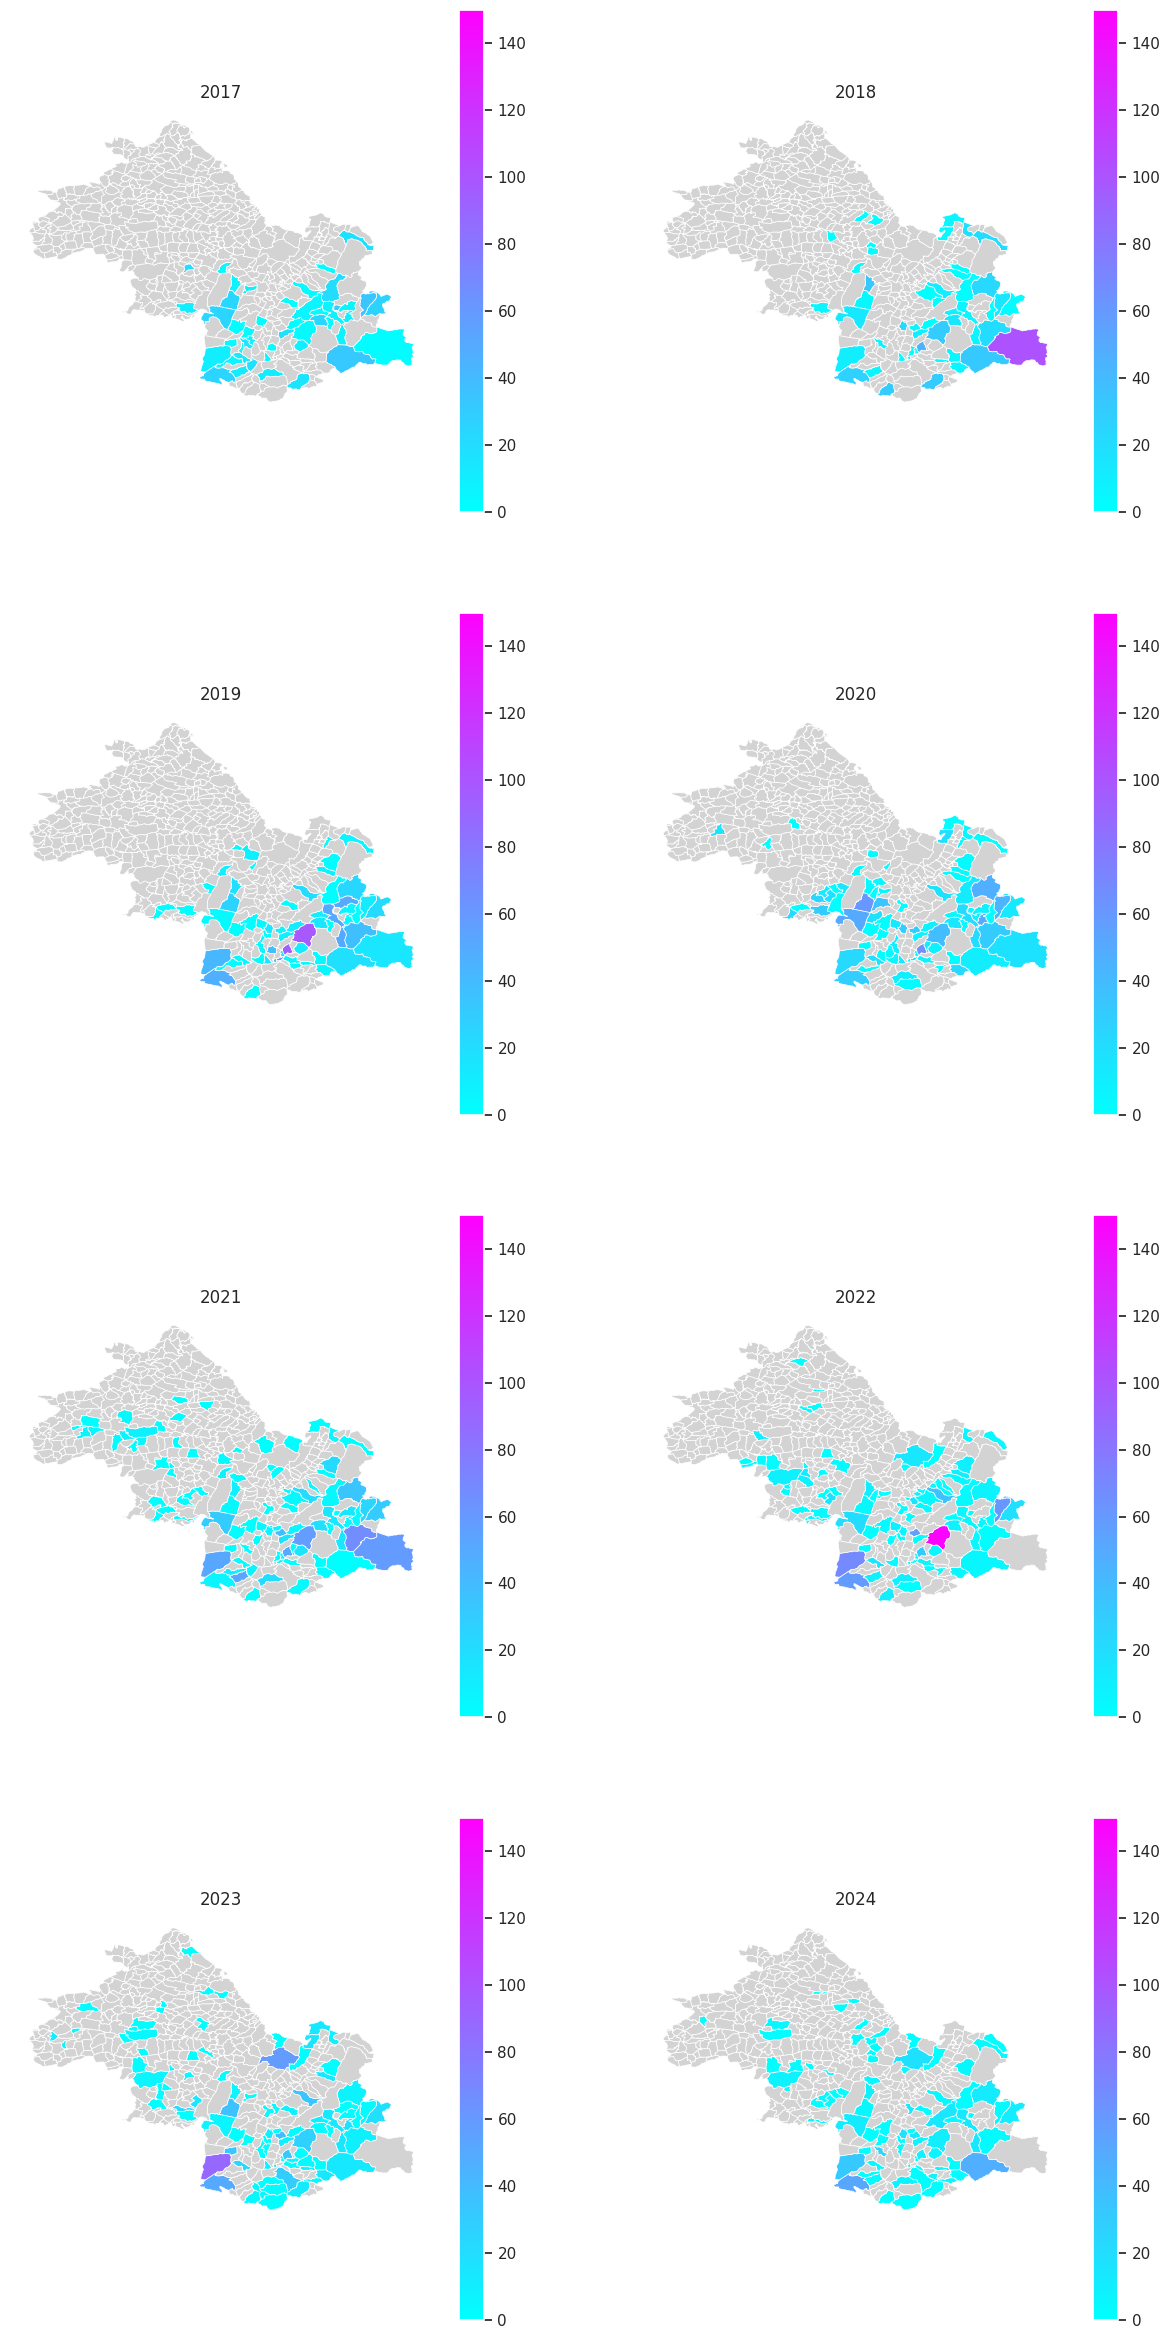

In [20]:
fig, axs = plt.subplots(4, 2, figsize=(15, 30))
axs[0, 0].set_axis_off()
axs[0, 0].set_title("2017")
par_commune_l_2017.plot(
    ax=axs[0, 0],
    column="Victimes constatées",
    linewidth=0.5,
    legend=True,
    # legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap="cool",
    vmin=0,
    vmax=150,
)
axs[0, 1].set_axis_off()
axs[0, 1].set_title("2018")
par_commune_l_2018.plot(
    ax=axs[0, 1],
    column="Victimes constatées",
    linewidth=0.5,
    legend=True,
    # legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap="cool",
    vmin=0,
    vmax=150,
)
axs[1, 0].set_axis_off()
axs[1, 0].set_title("2019")
par_commune_l_2019.plot(
    ax=axs[1, 0],
    column="Victimes constatées",
    linewidth=0.5,
    legend=True,
    # legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap="cool",
    vmin=0,
    vmax=150,
)
axs[1, 1].set_axis_off()
axs[1, 1].set_title("2020")
par_commune_l_2020.plot(
    ax=axs[1, 1],
    column="Victimes constatées",
    linewidth=0.5,
    legend=True,
    # legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap="cool",
    vmin=0,
    vmax=150,
)
axs[2, 0].set_axis_off()
axs[2, 0].set_title("2021")
par_commune_l_2021.plot(
    ax=axs[2, 0],
    column="Victimes constatées",
    linewidth=0.5,
    legend=True,
    # legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap="cool",
    vmin=0,
    vmax=150,
)
axs[2, 1].set_axis_off()
axs[2, 1].set_title("2022")
par_commune_l_2022.plot(
    ax=axs[2, 1],
    column="Victimes constatées",
    linewidth=0.5,
    legend=True,
    # legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap="cool",
    vmin=0,
    vmax=150,
)
axs[3, 0].set_axis_off()
axs[3, 0].set_title("2023")
par_commune_l_2023.plot(
    ax=axs[3, 0],
    column="Victimes constatées",
    linewidth=0.5,
    legend=True,
    # legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap="cool",
    vmin=0,
    vmax=150,
)
axs[3, 1].set_axis_off()
axs[3, 1].set_title("2024")
par_commune_l_2024.plot(
    ax=axs[3, 1],
    column="Victimes constatées",
    linewidth=0.5,
    legend=True,
    # legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap="cool",
    vmin=0,
    vmax=150,
)

## Etude de certains secteurs

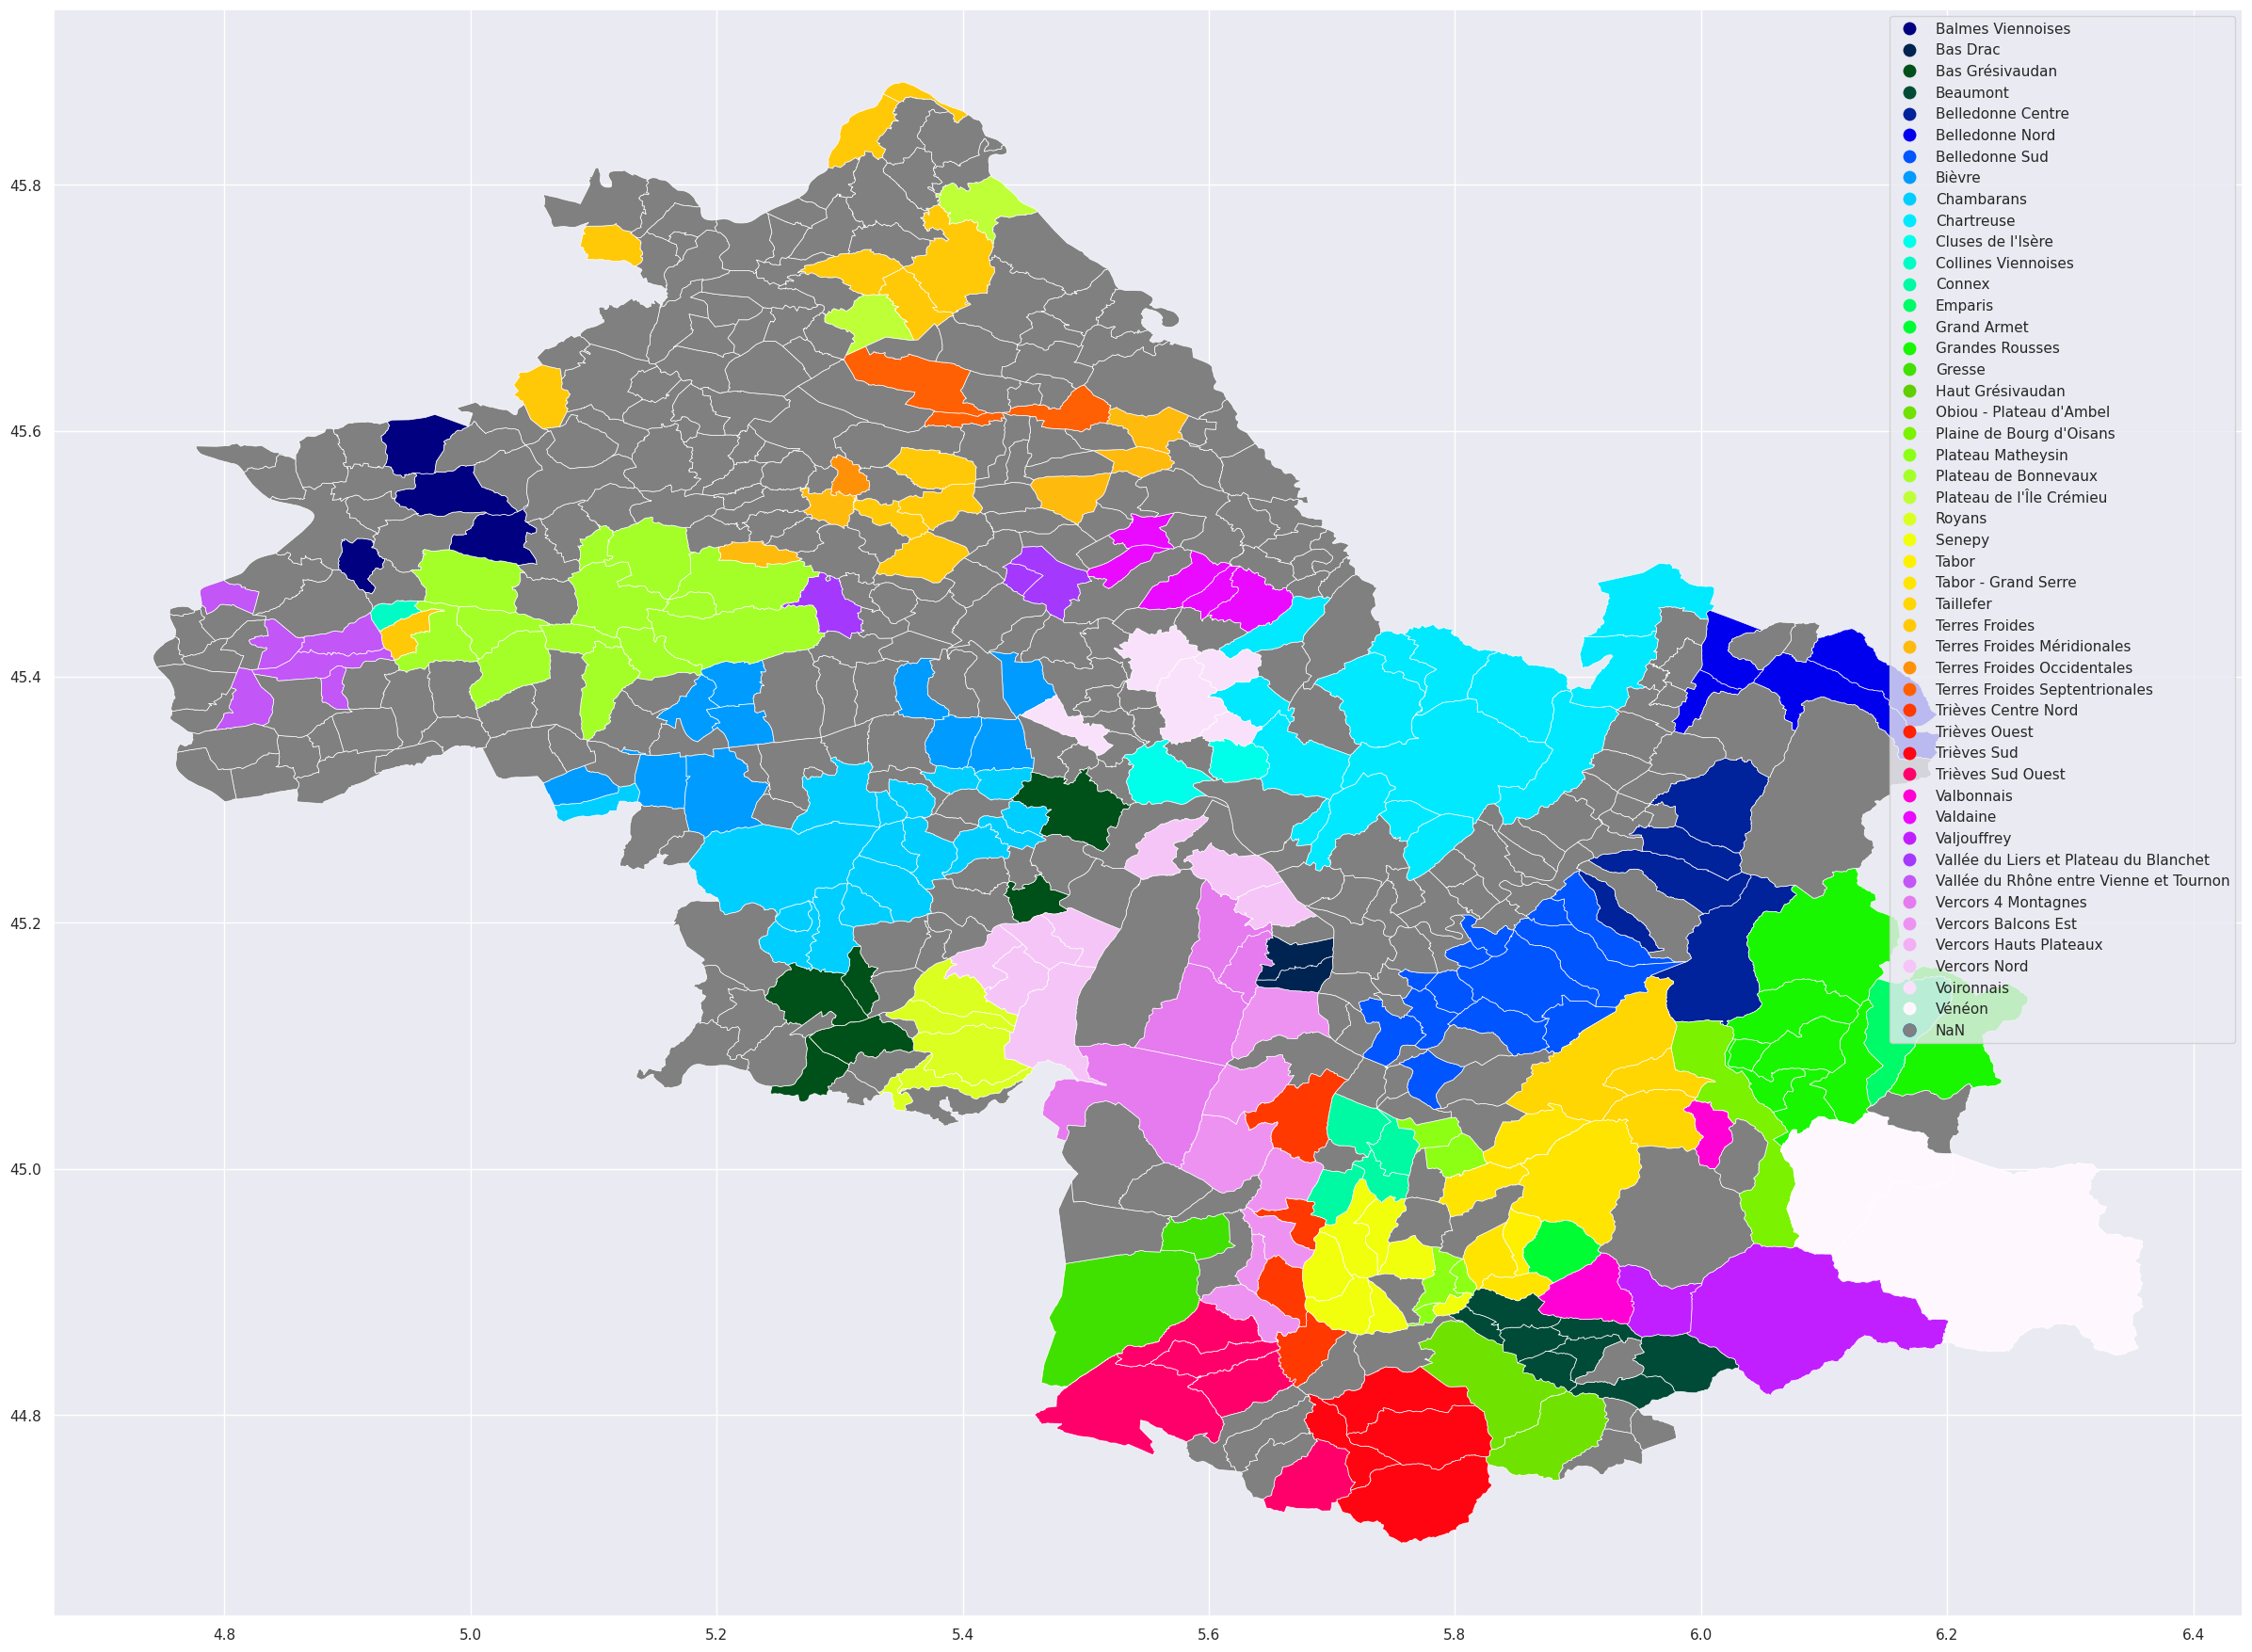

In [21]:
secteurs = communes_38.merge(
    constats[["Commune", "Secteur"]].drop_duplicates(), on="Commune", how="outer"
)
secteurs.plot(
    column="Secteur",
    categorical=True,
    missing_kwds={"color": "grey"},
    legend=True,
    figsize=(30,30),
    cmap="gist_ncar",
    linewidth=0.5,
);

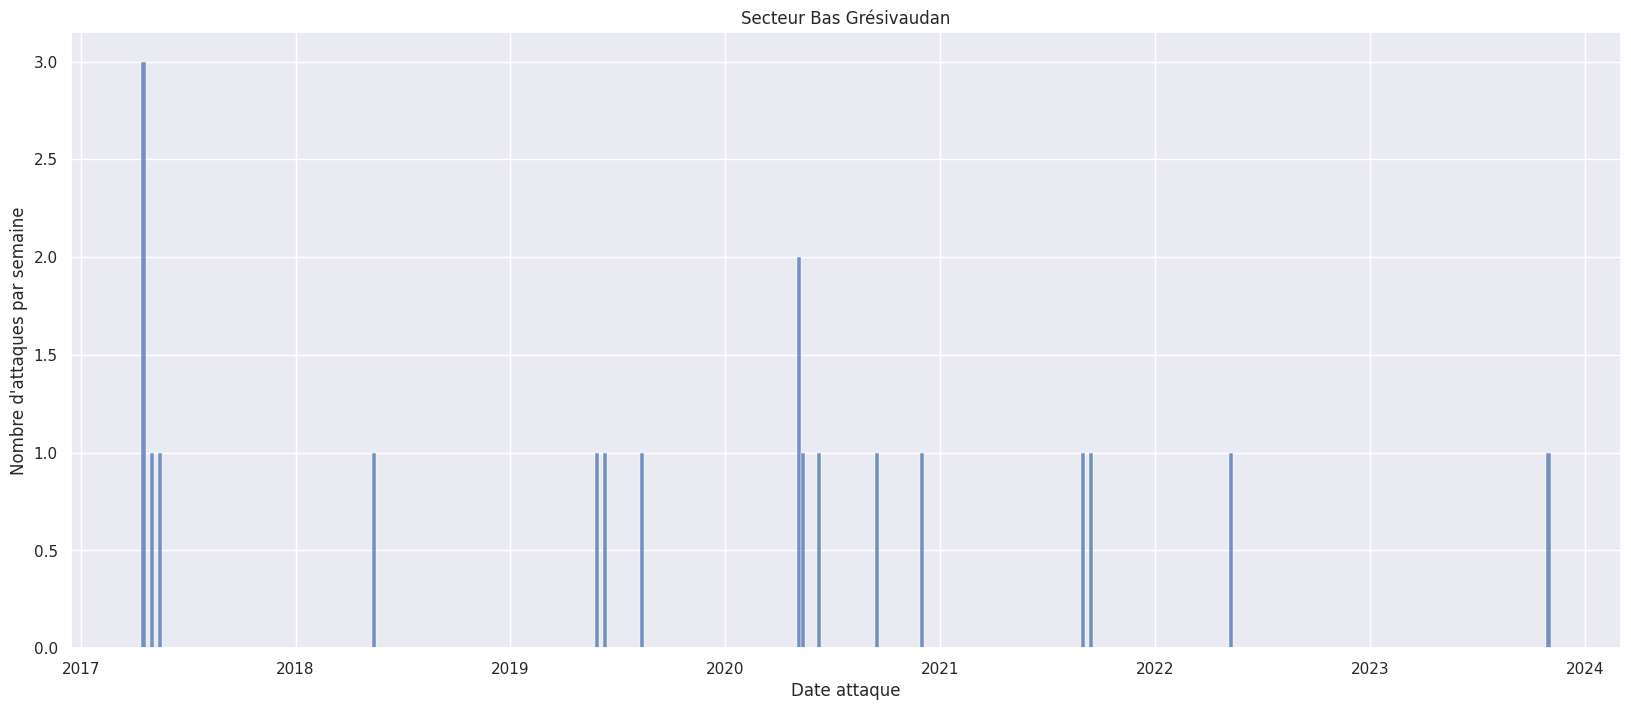

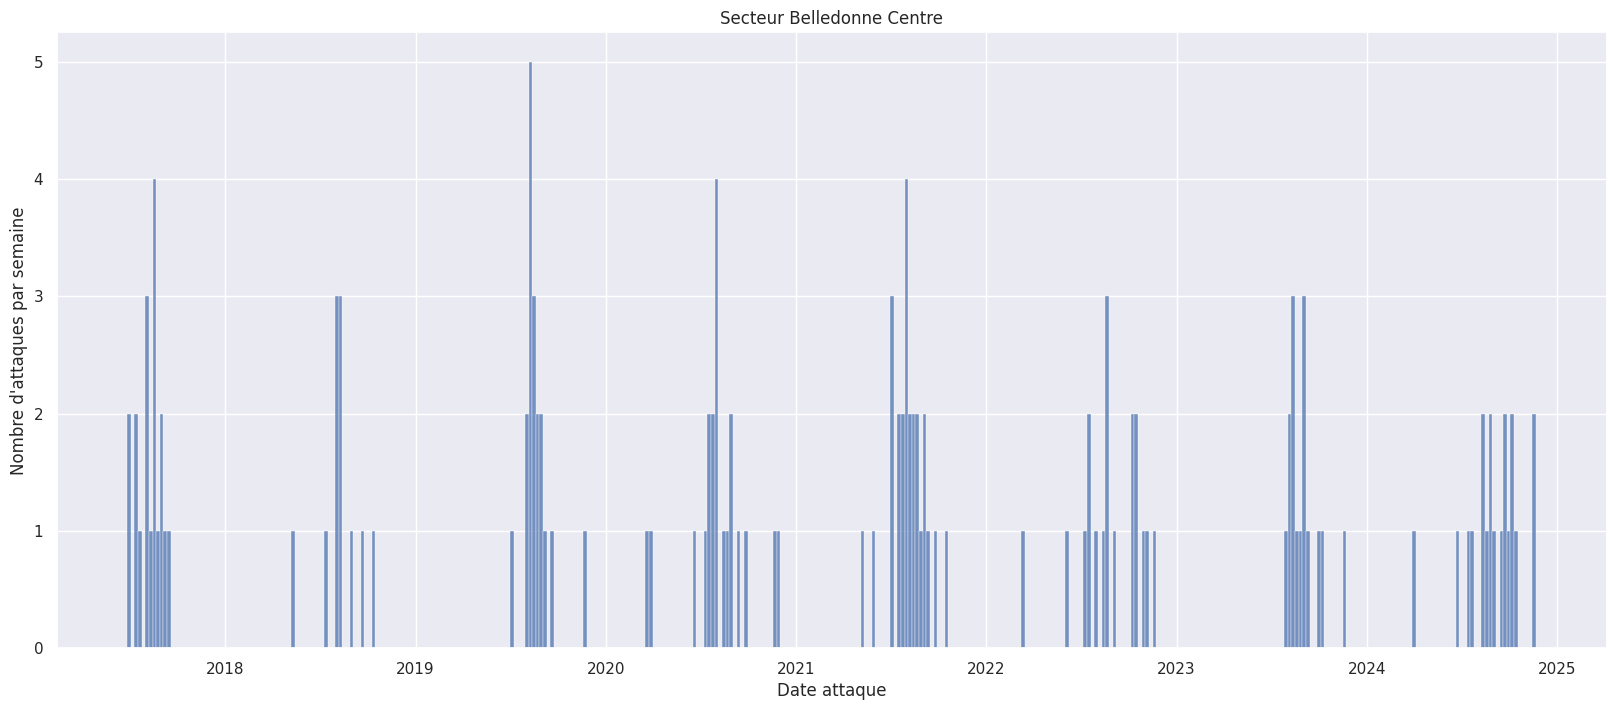

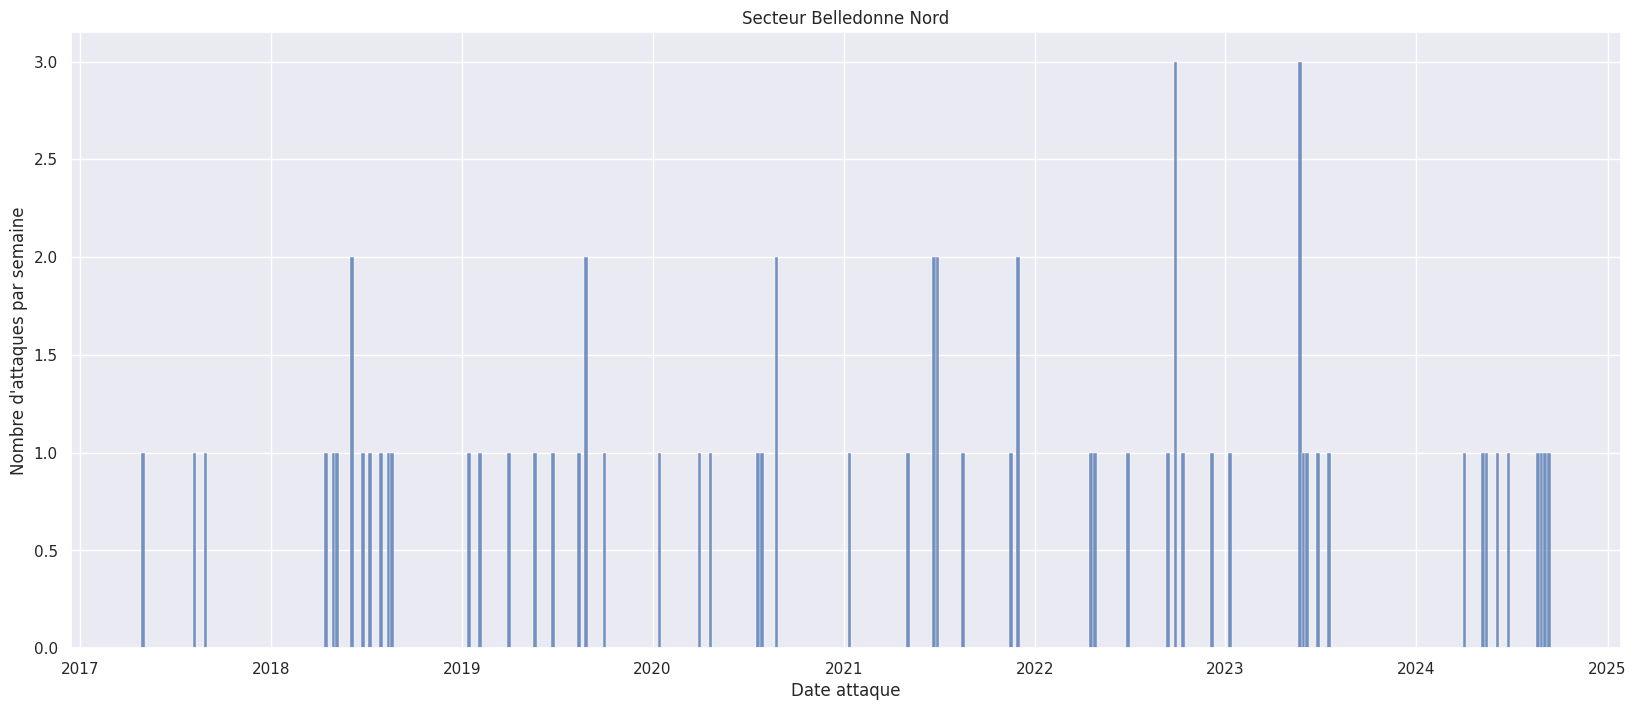

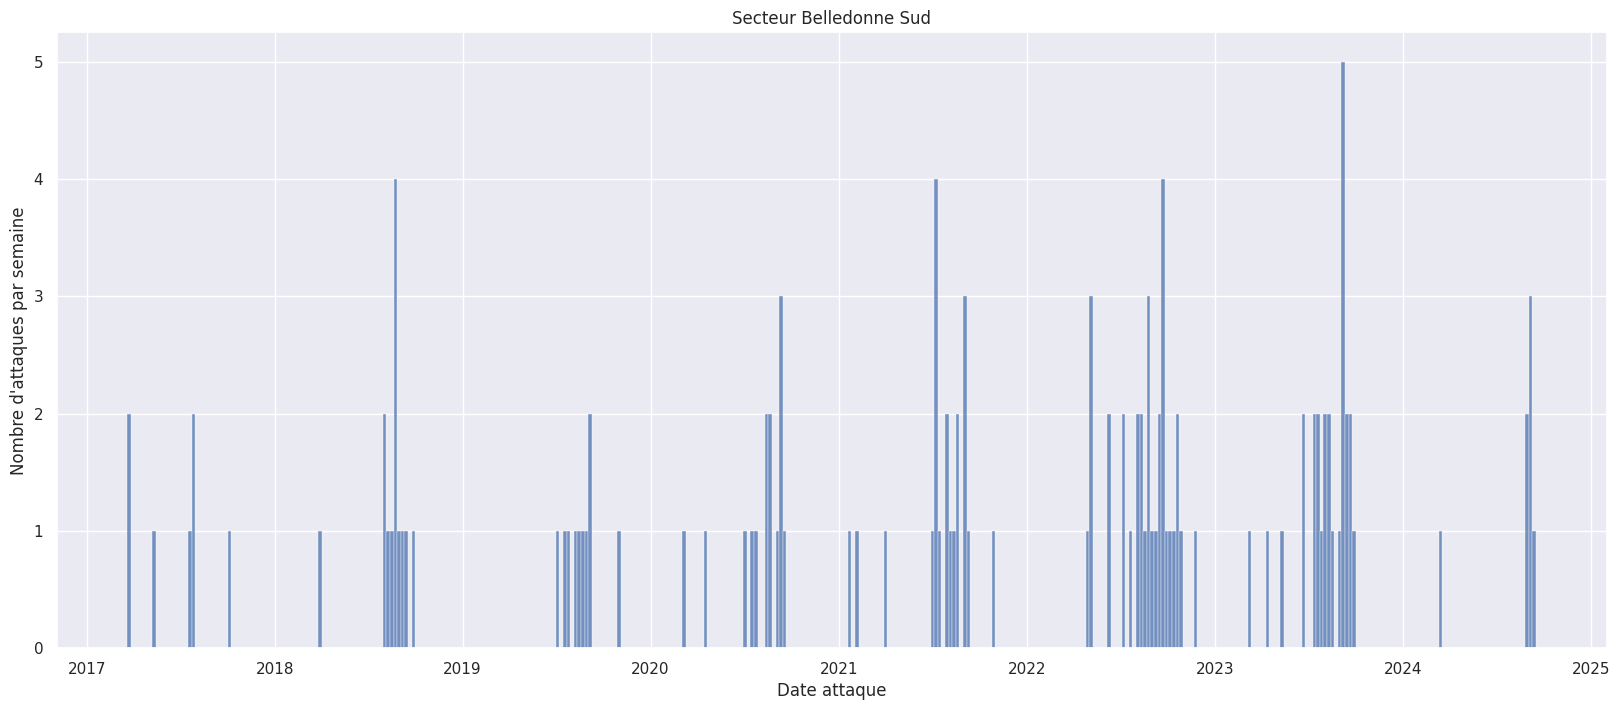

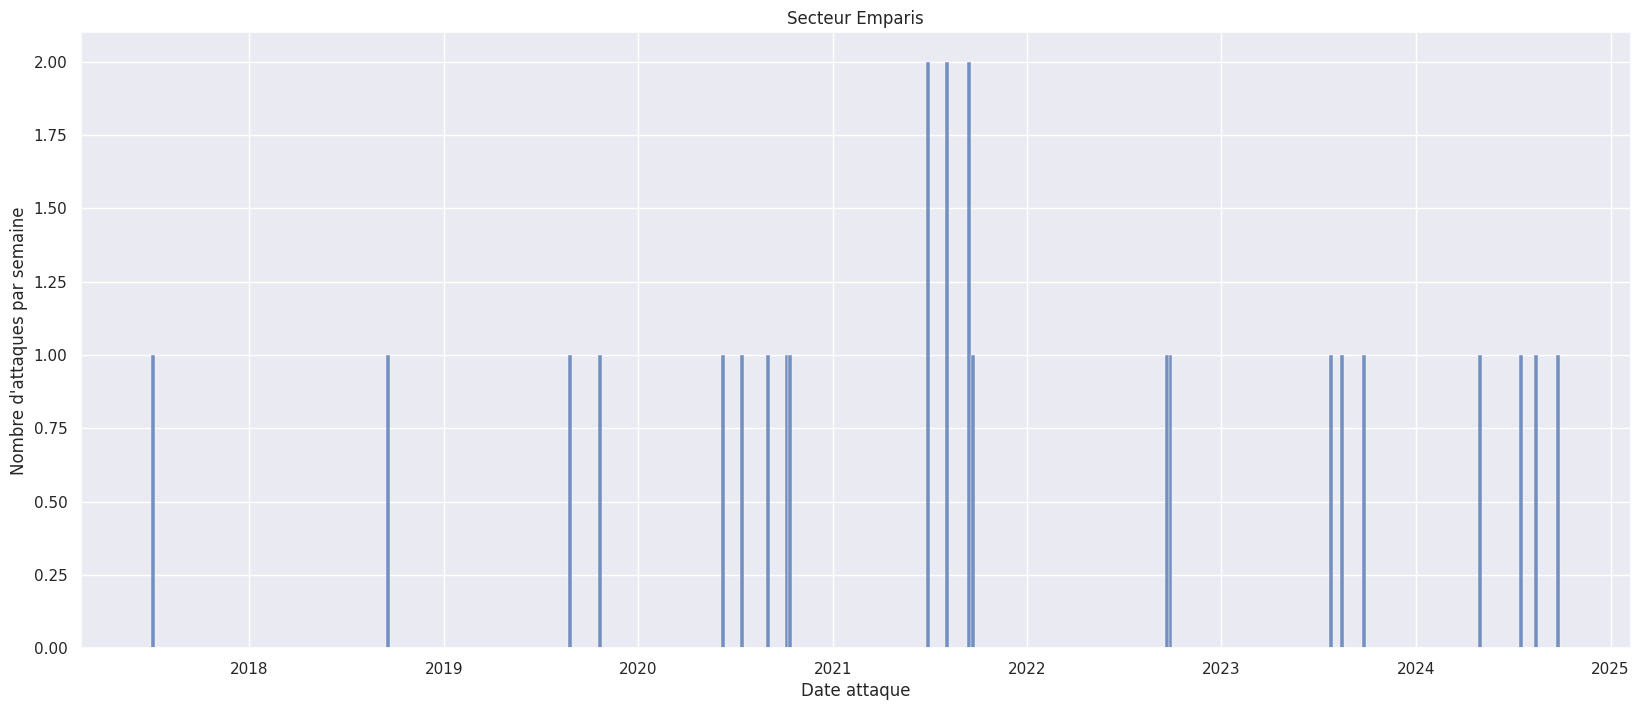

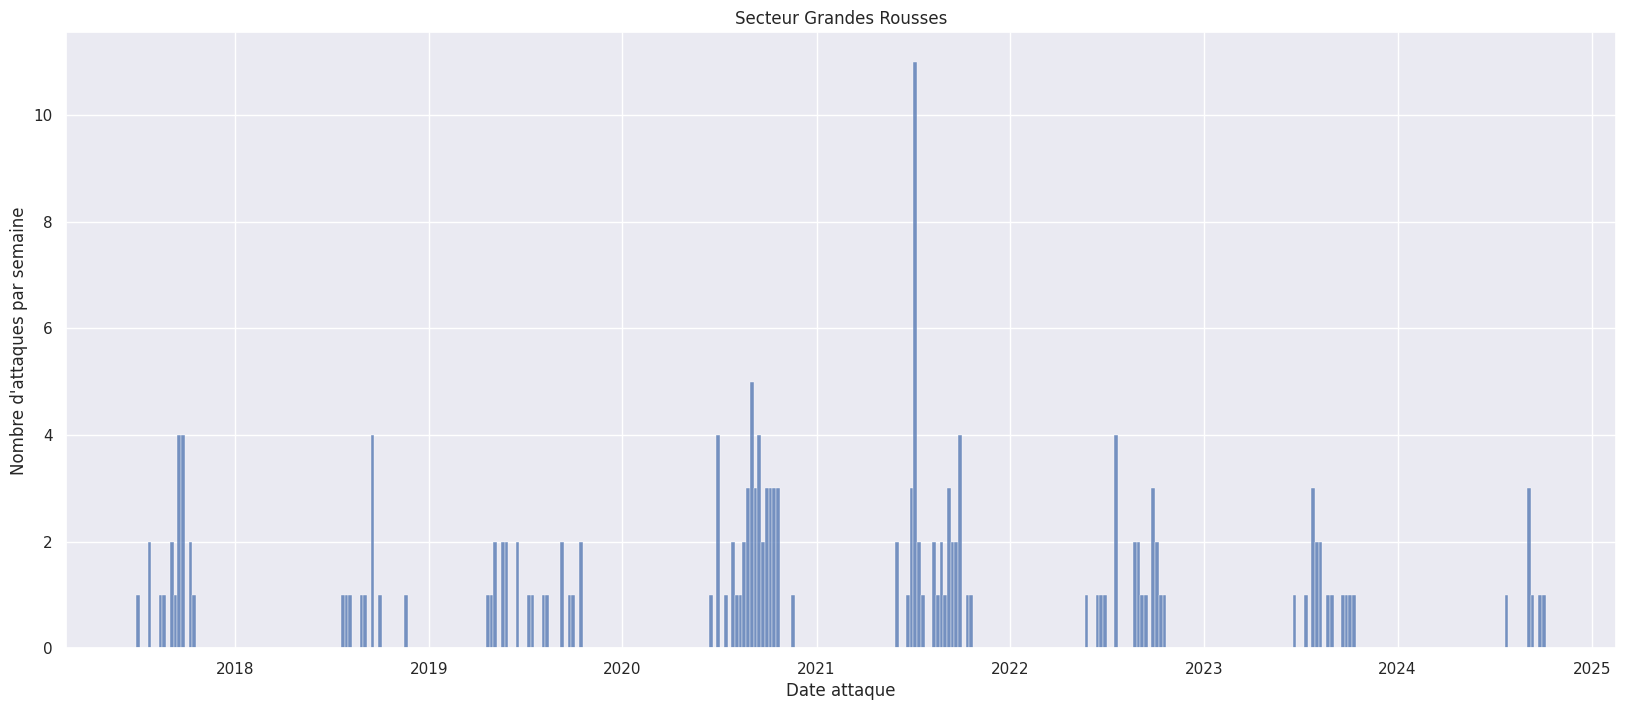

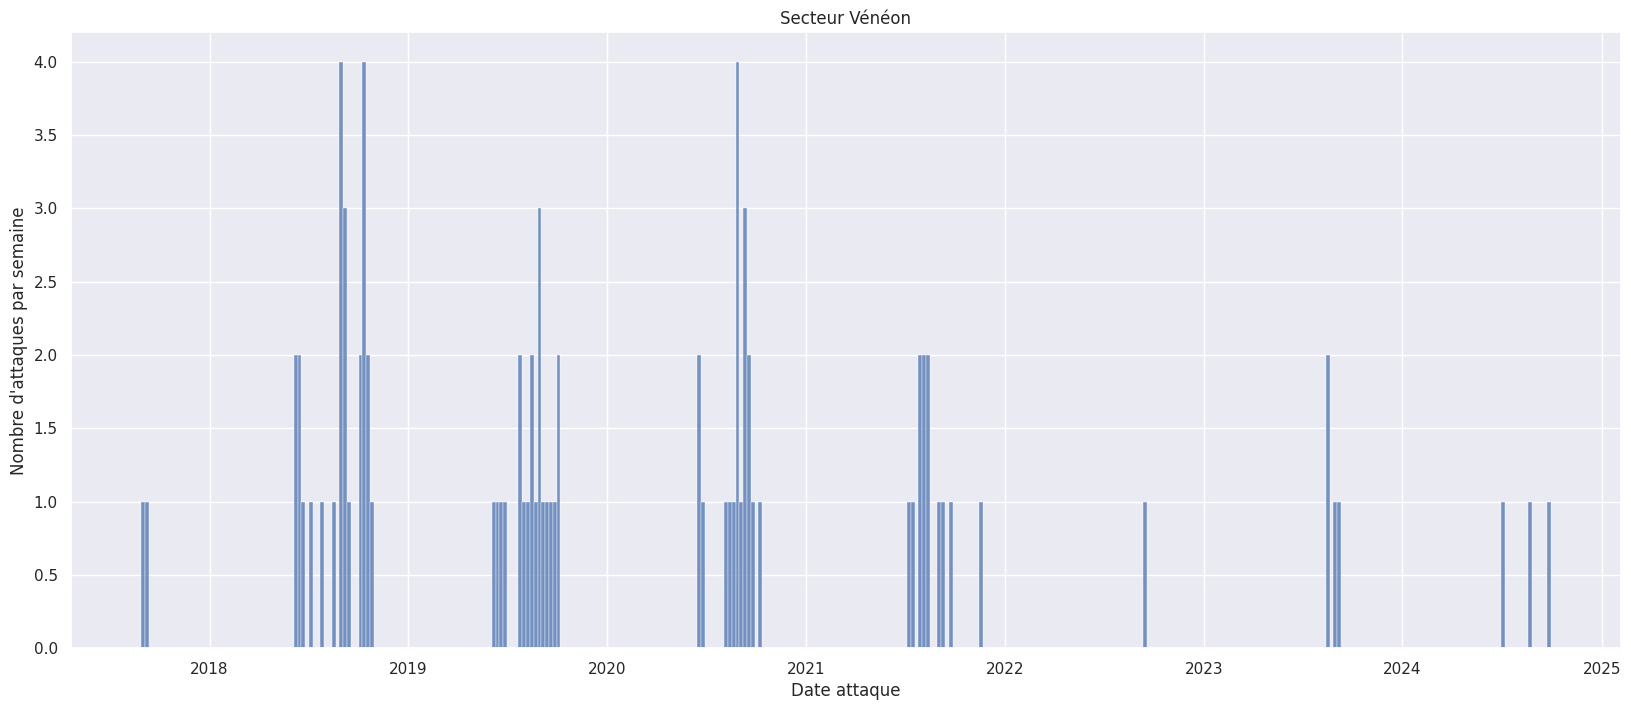

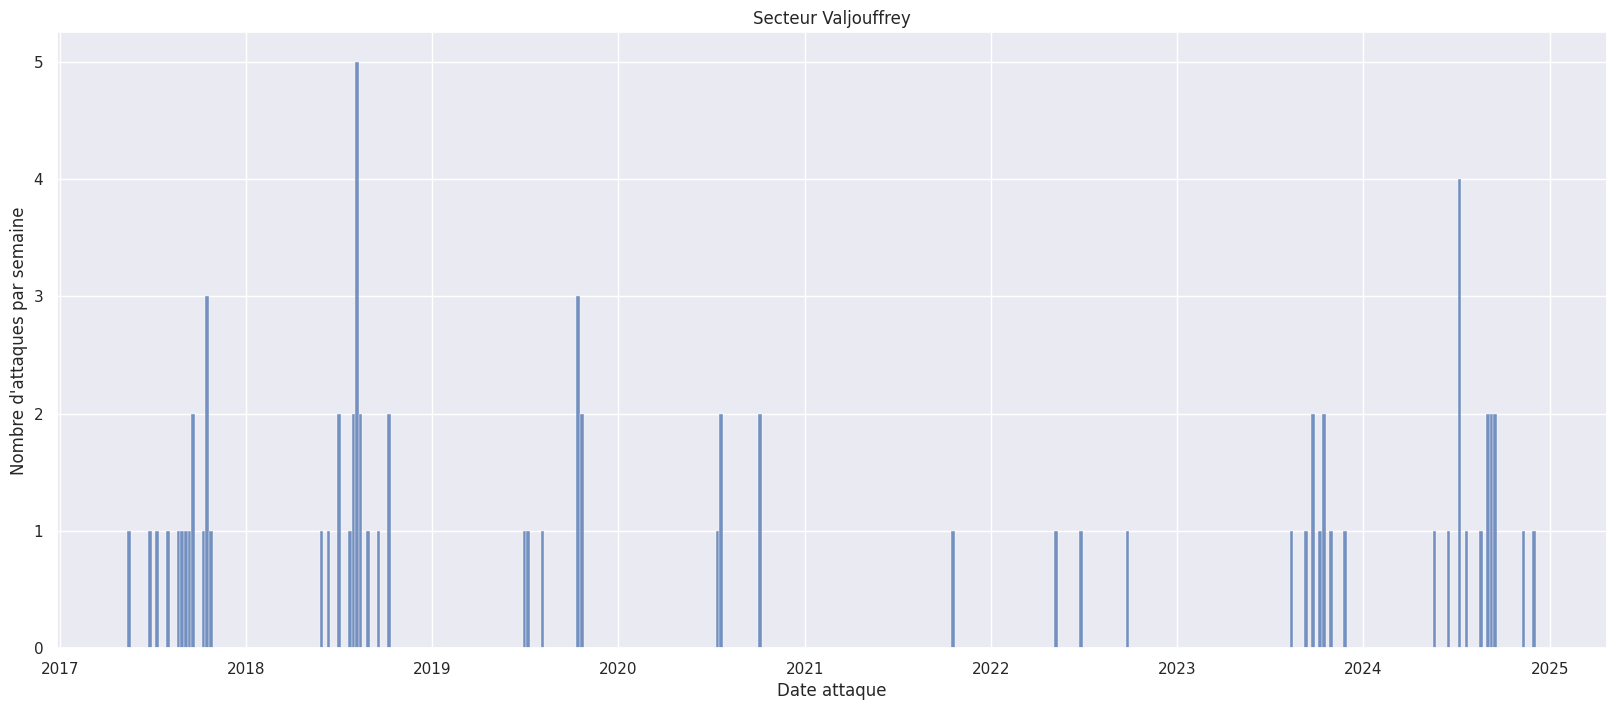

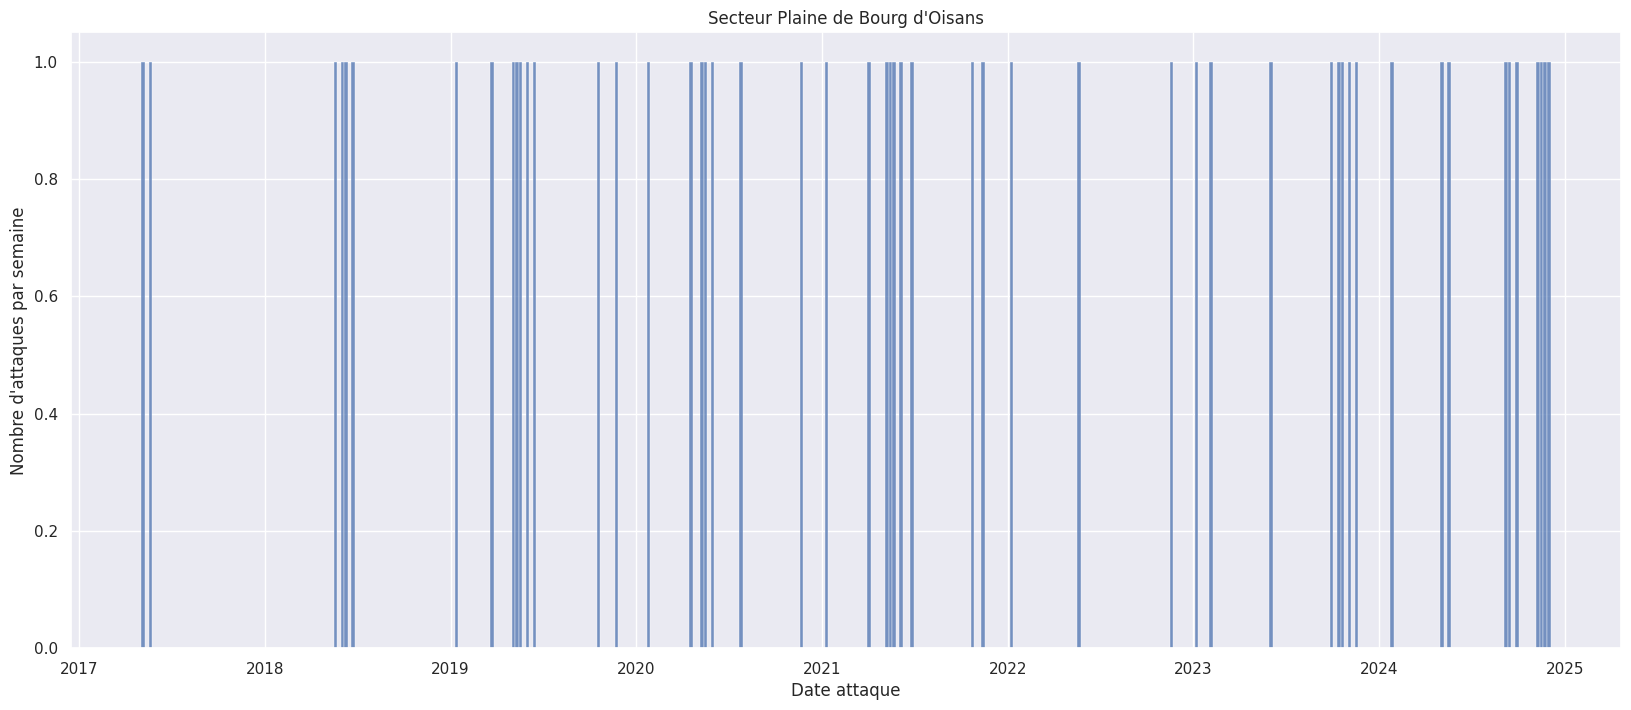

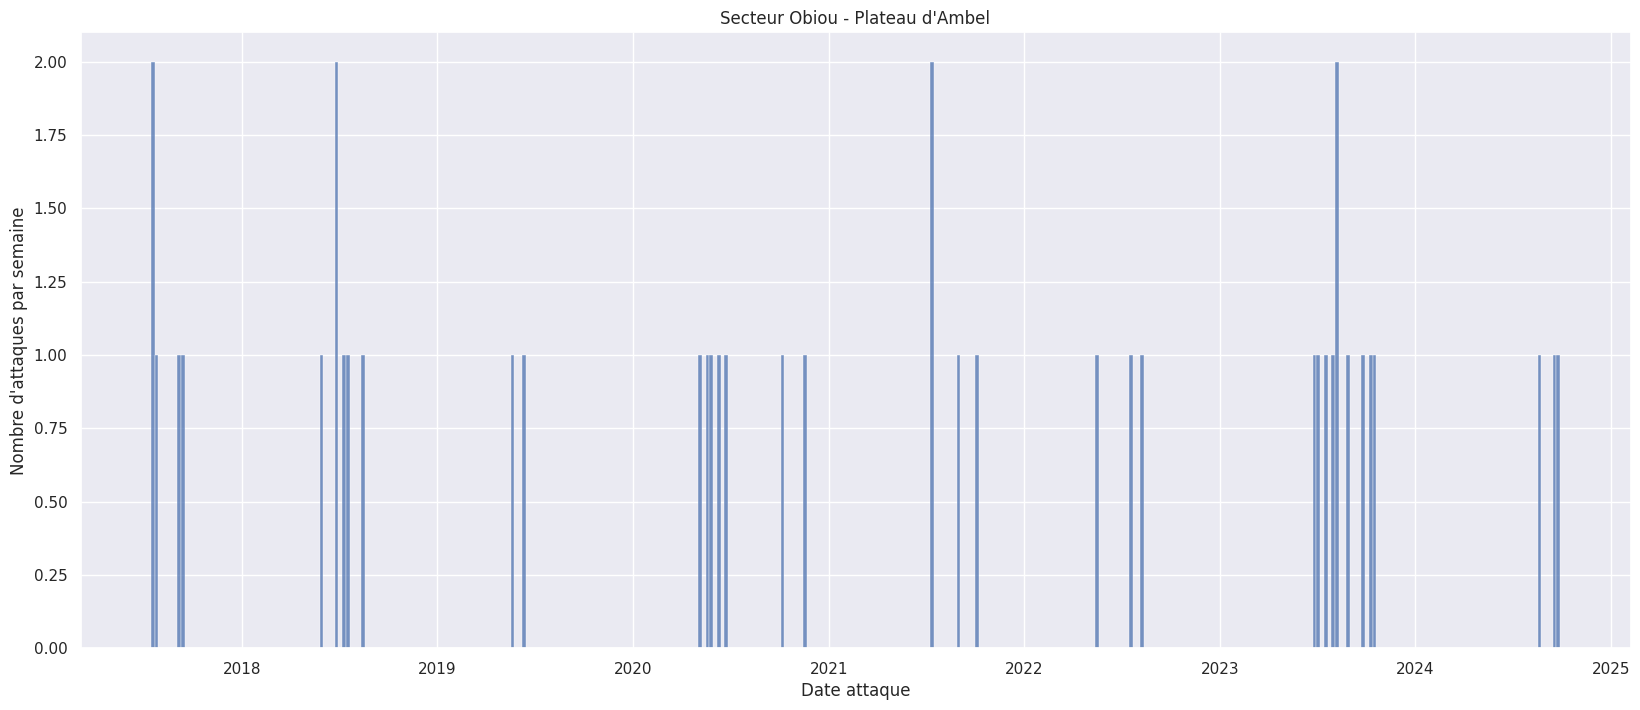

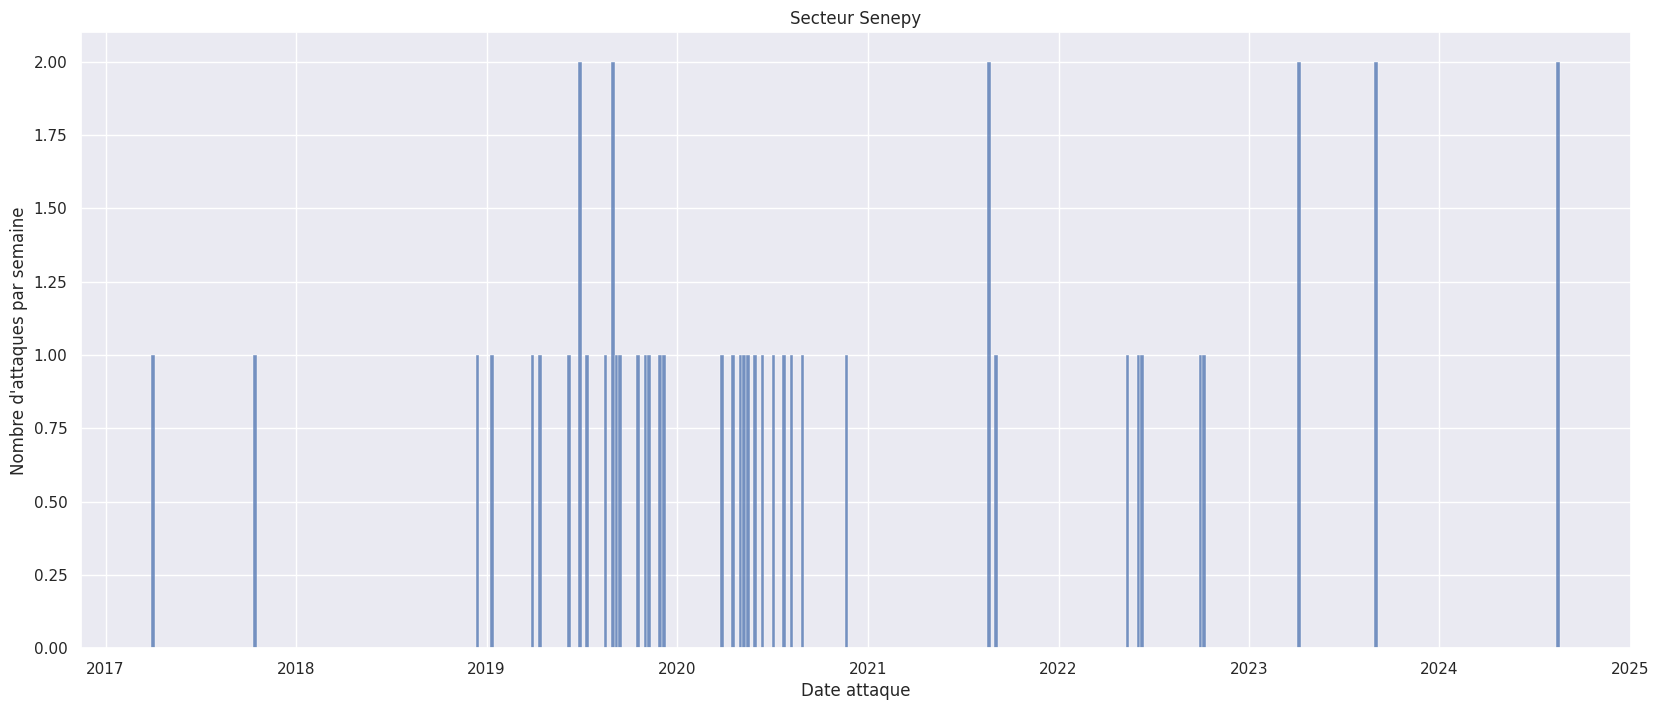

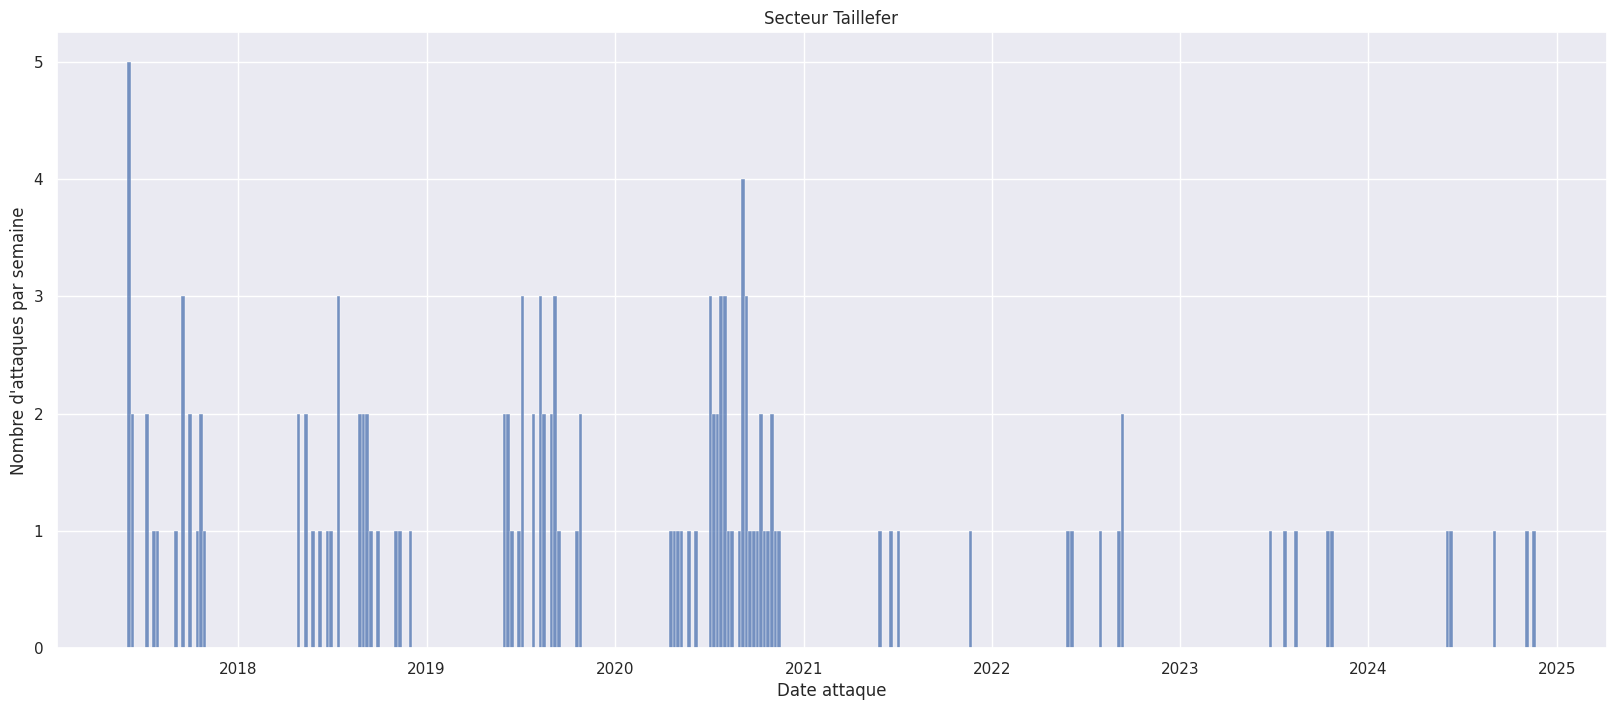

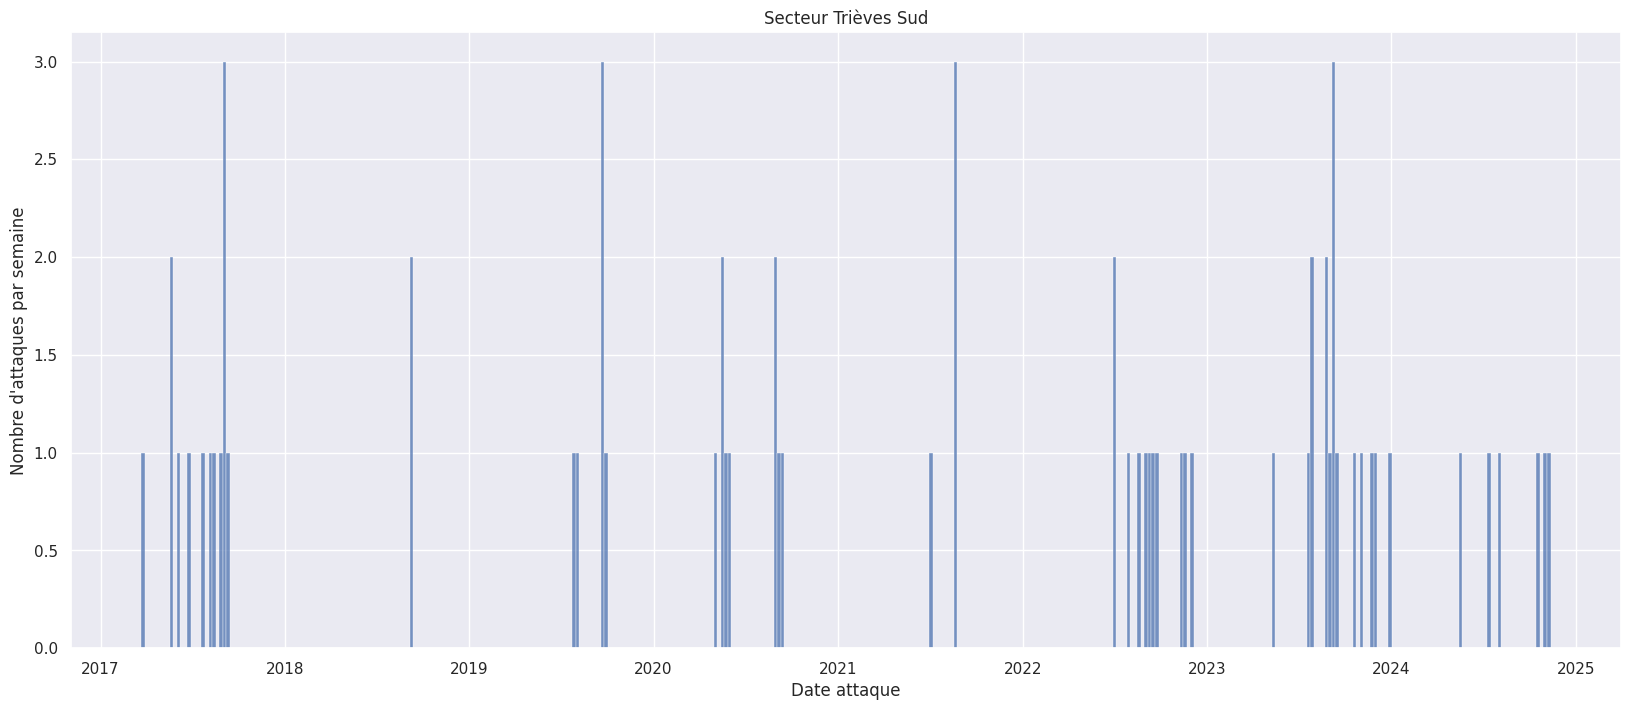

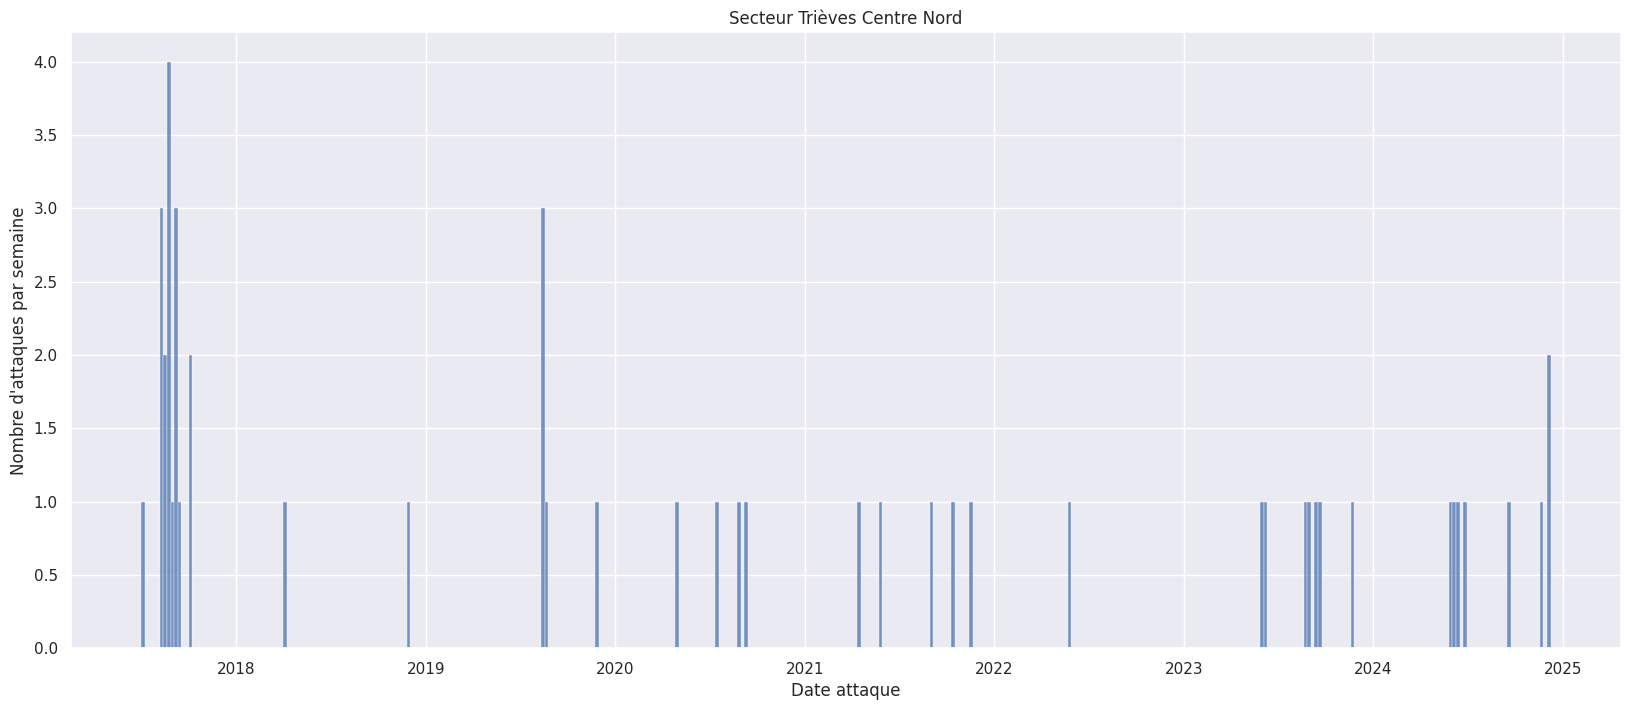

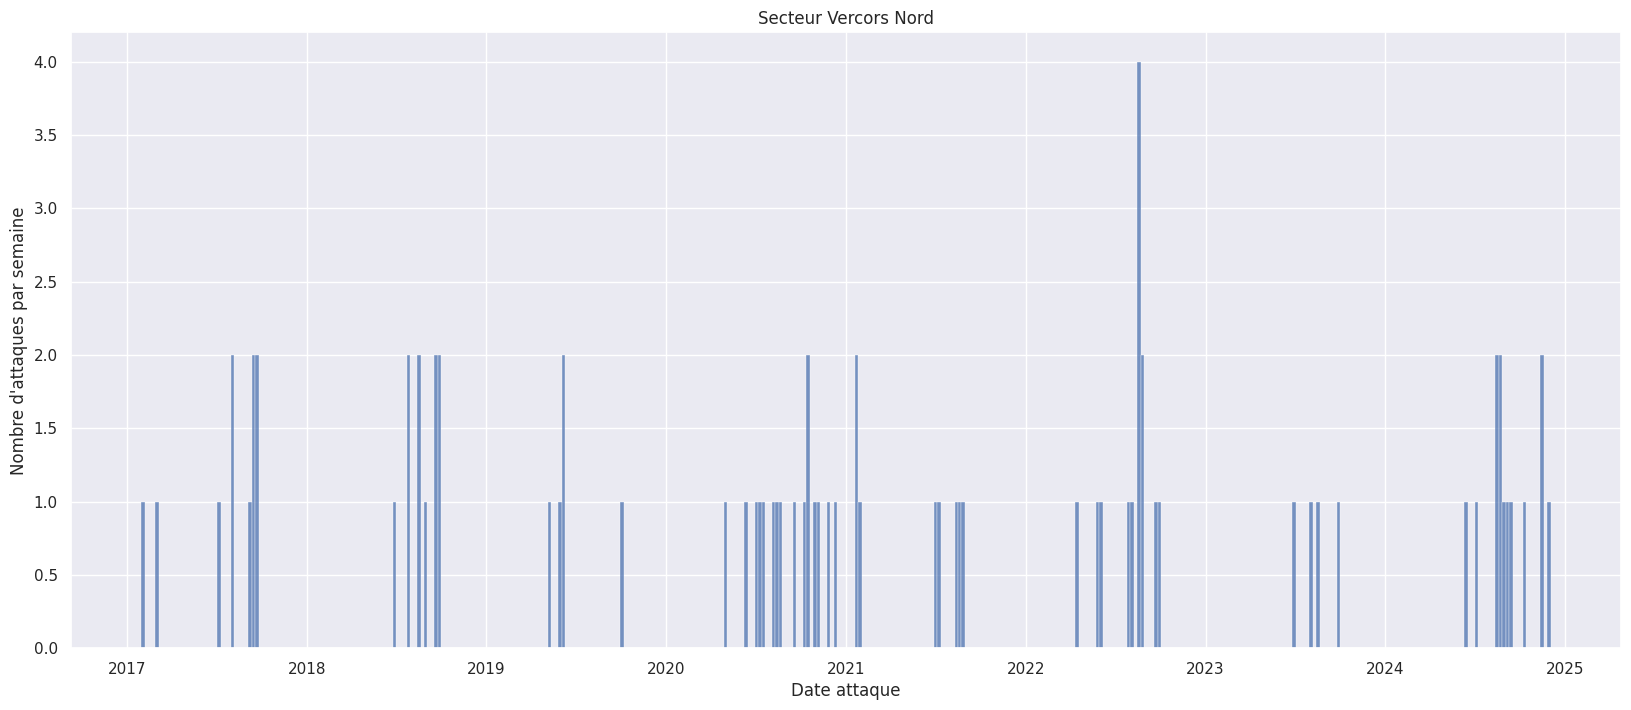

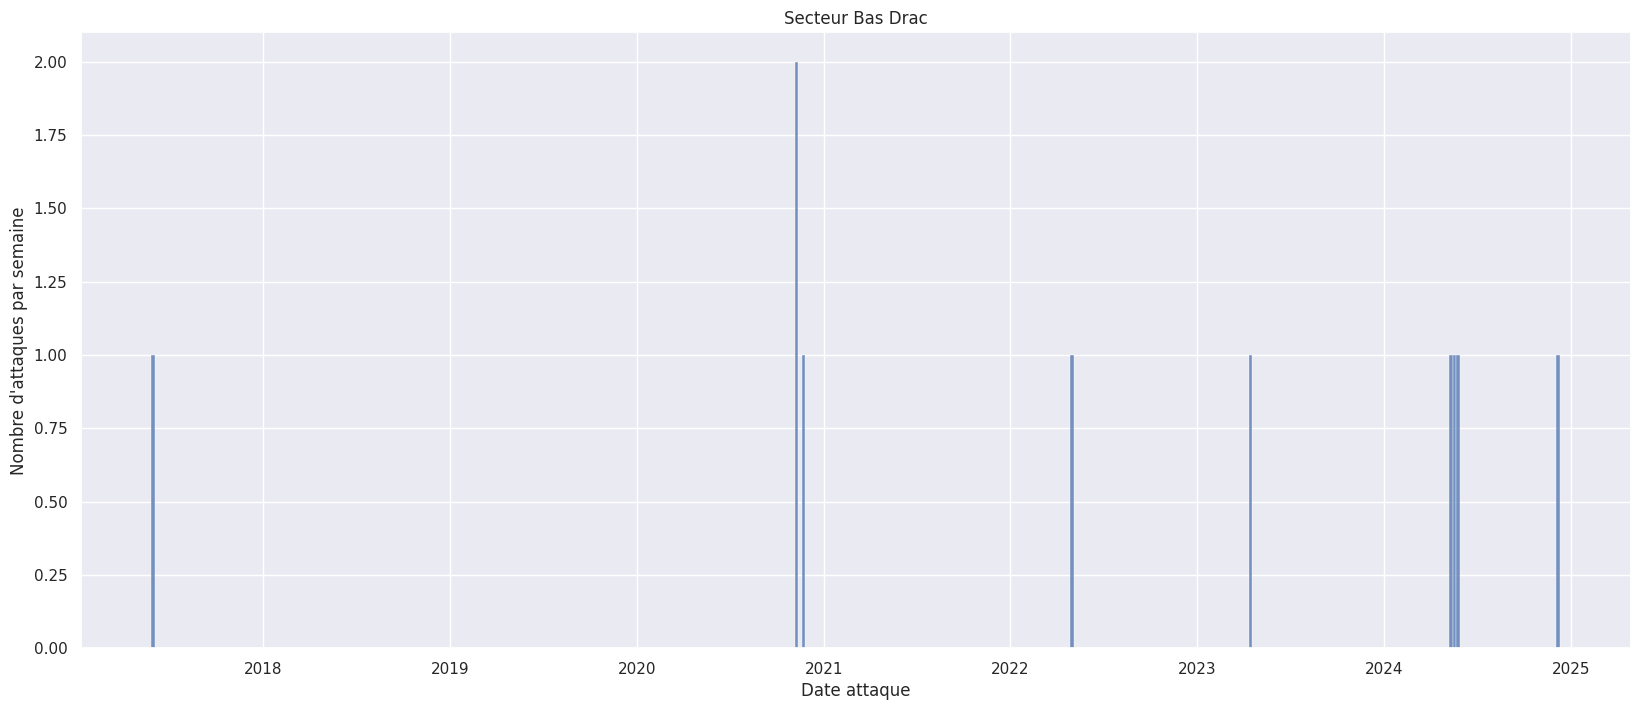

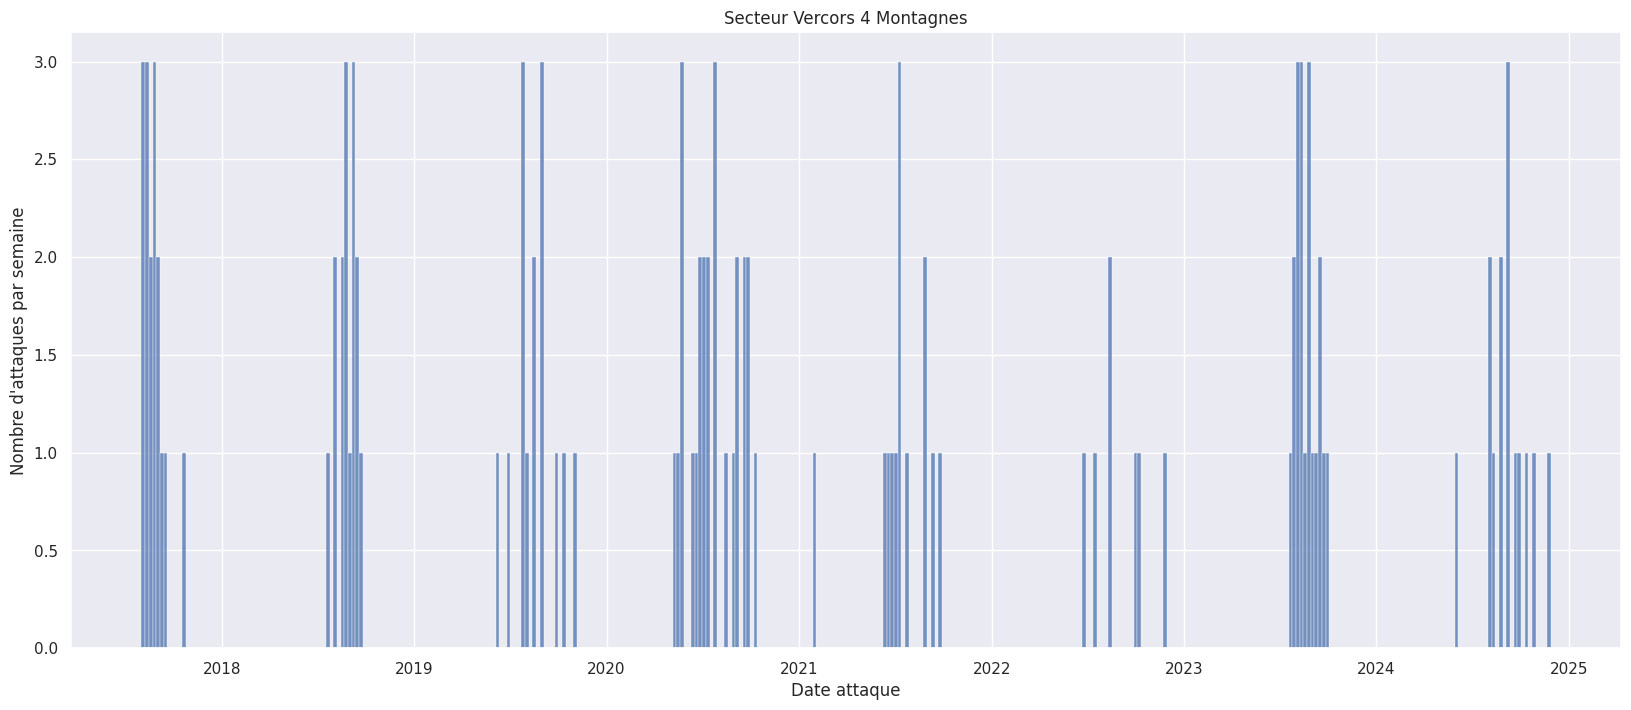

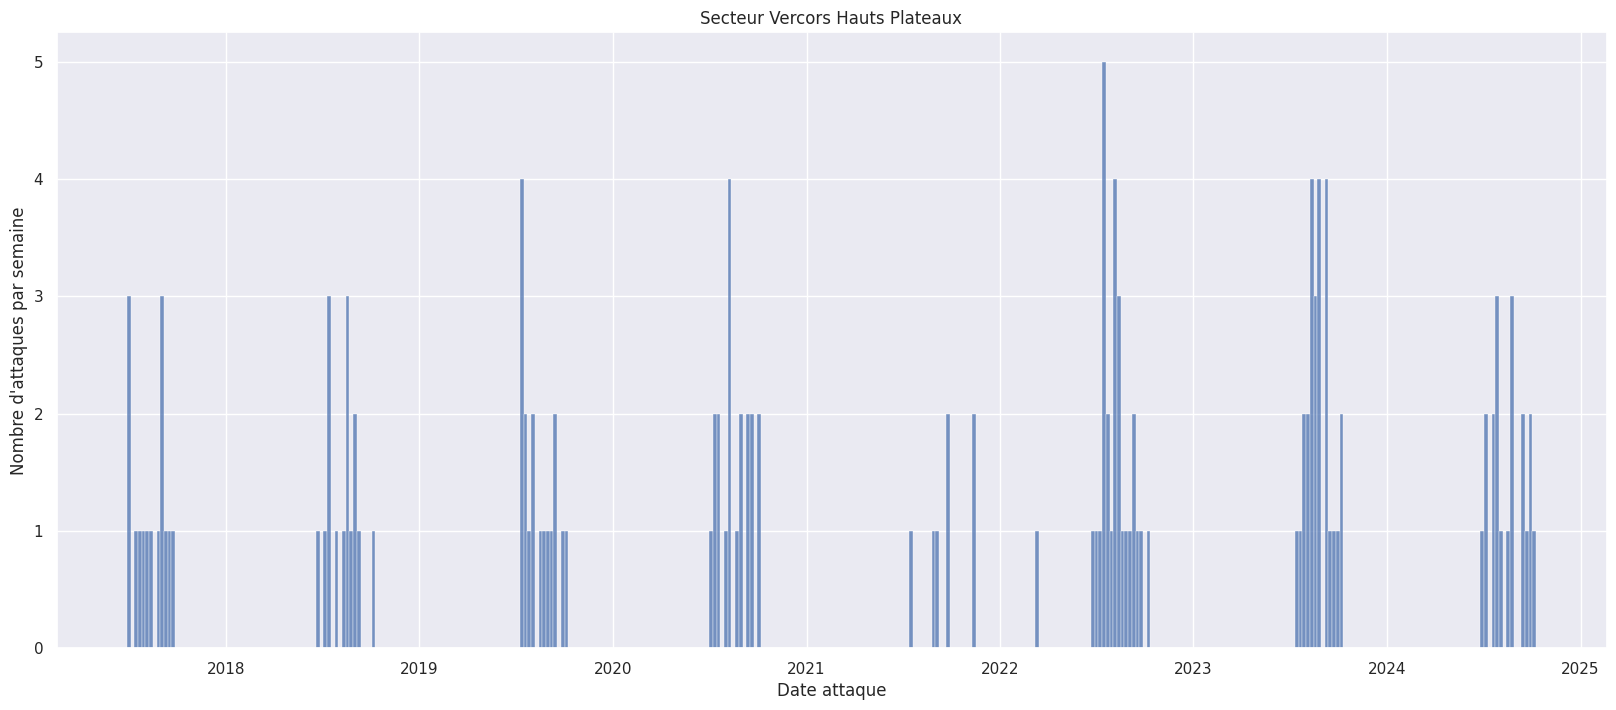

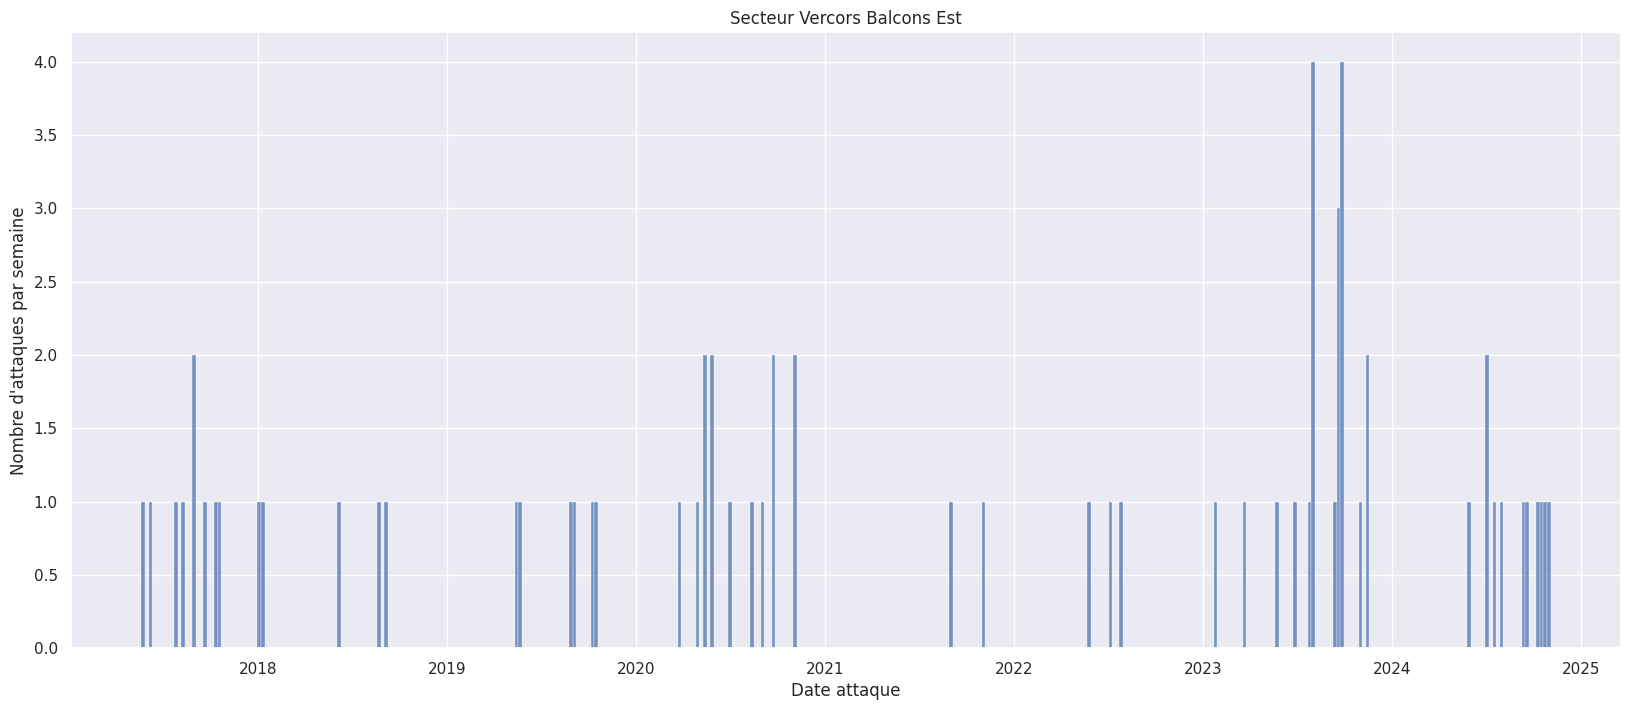

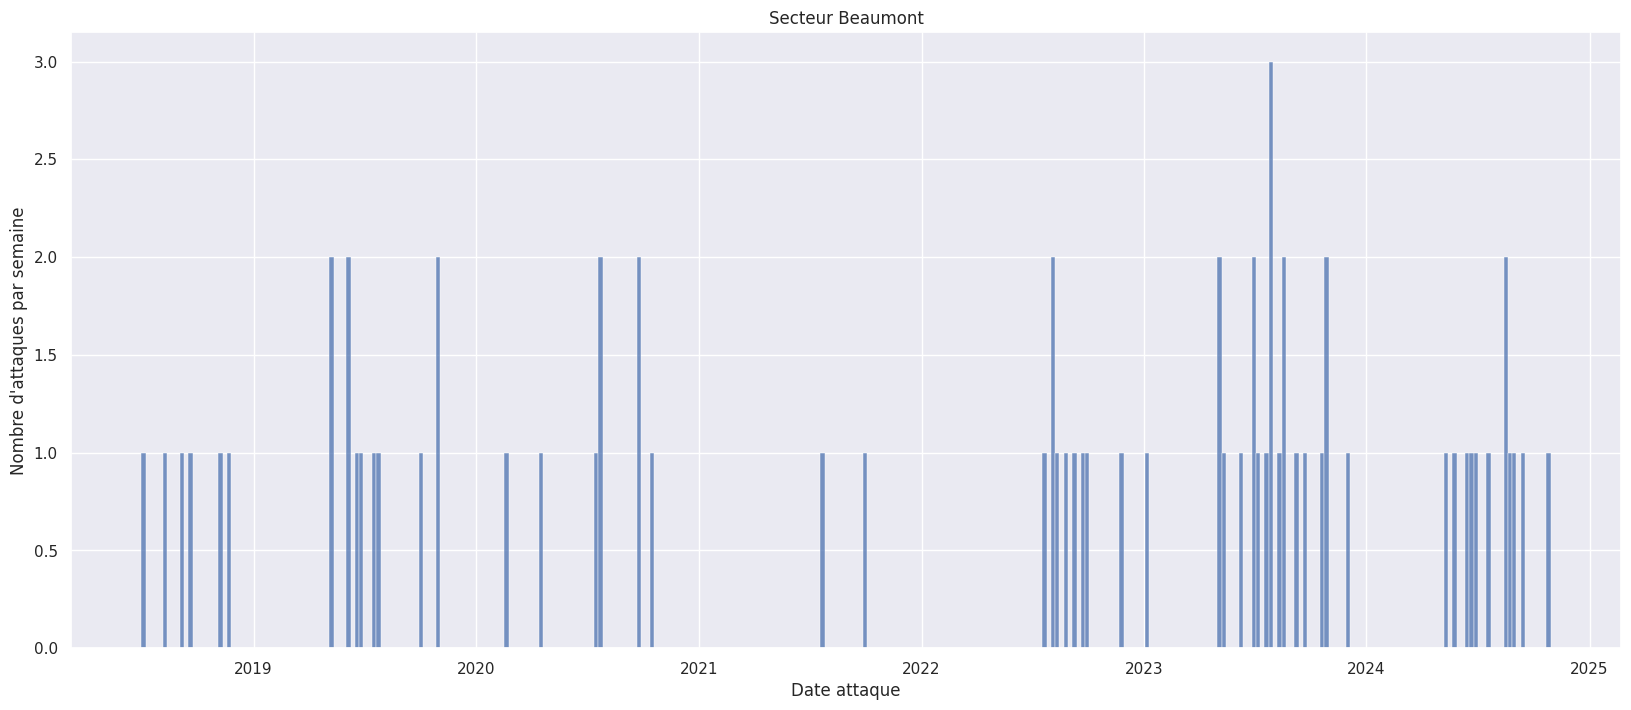

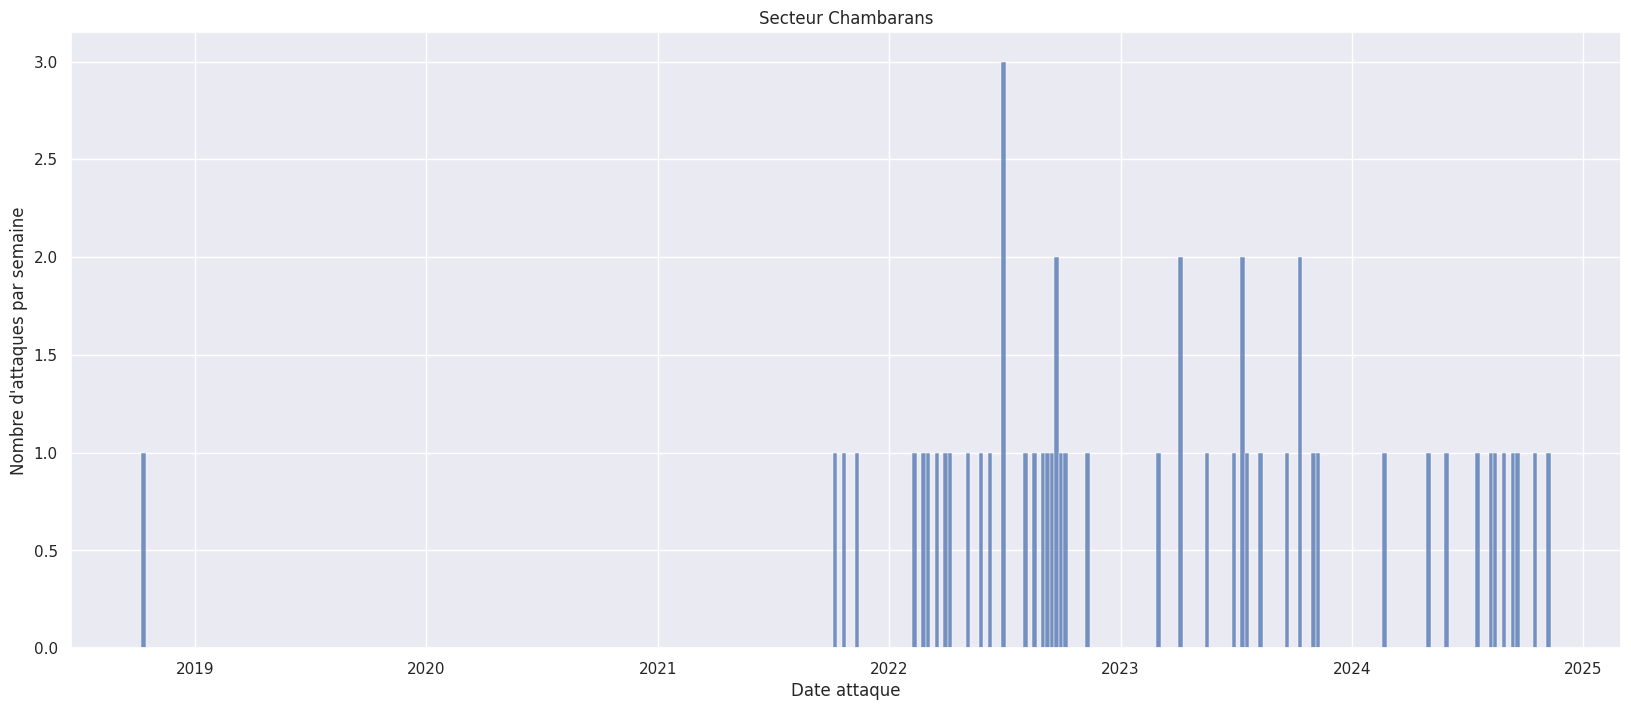

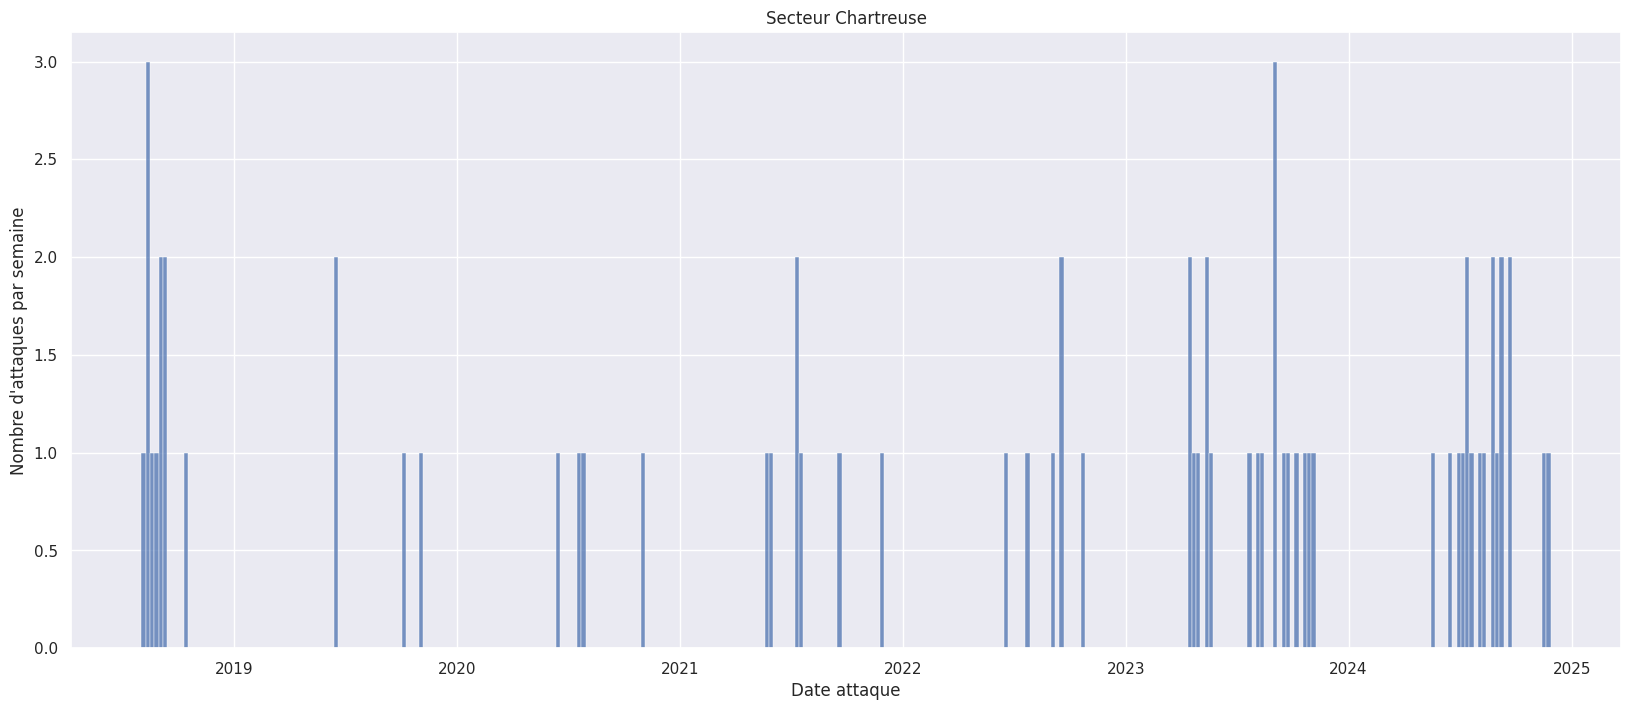

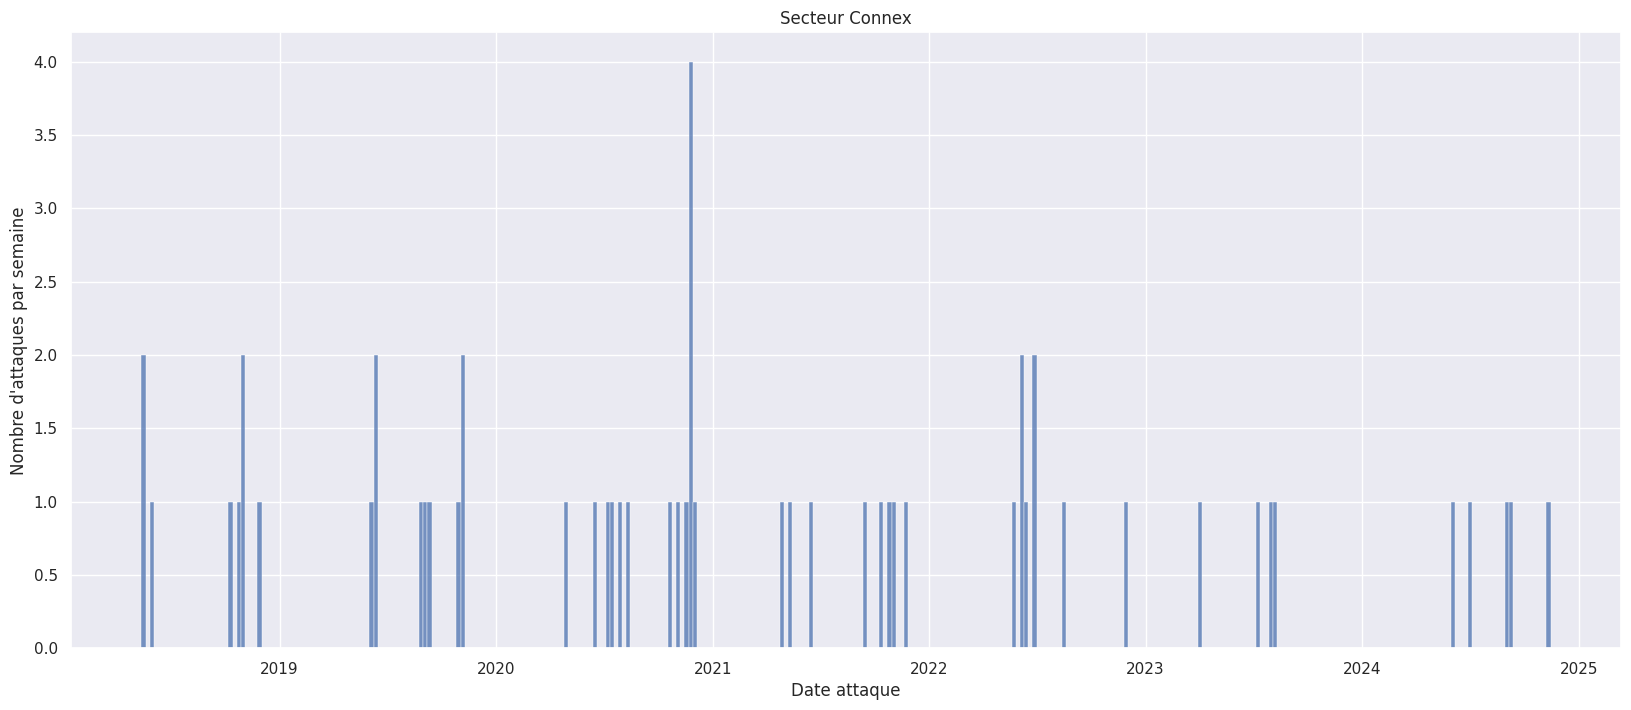

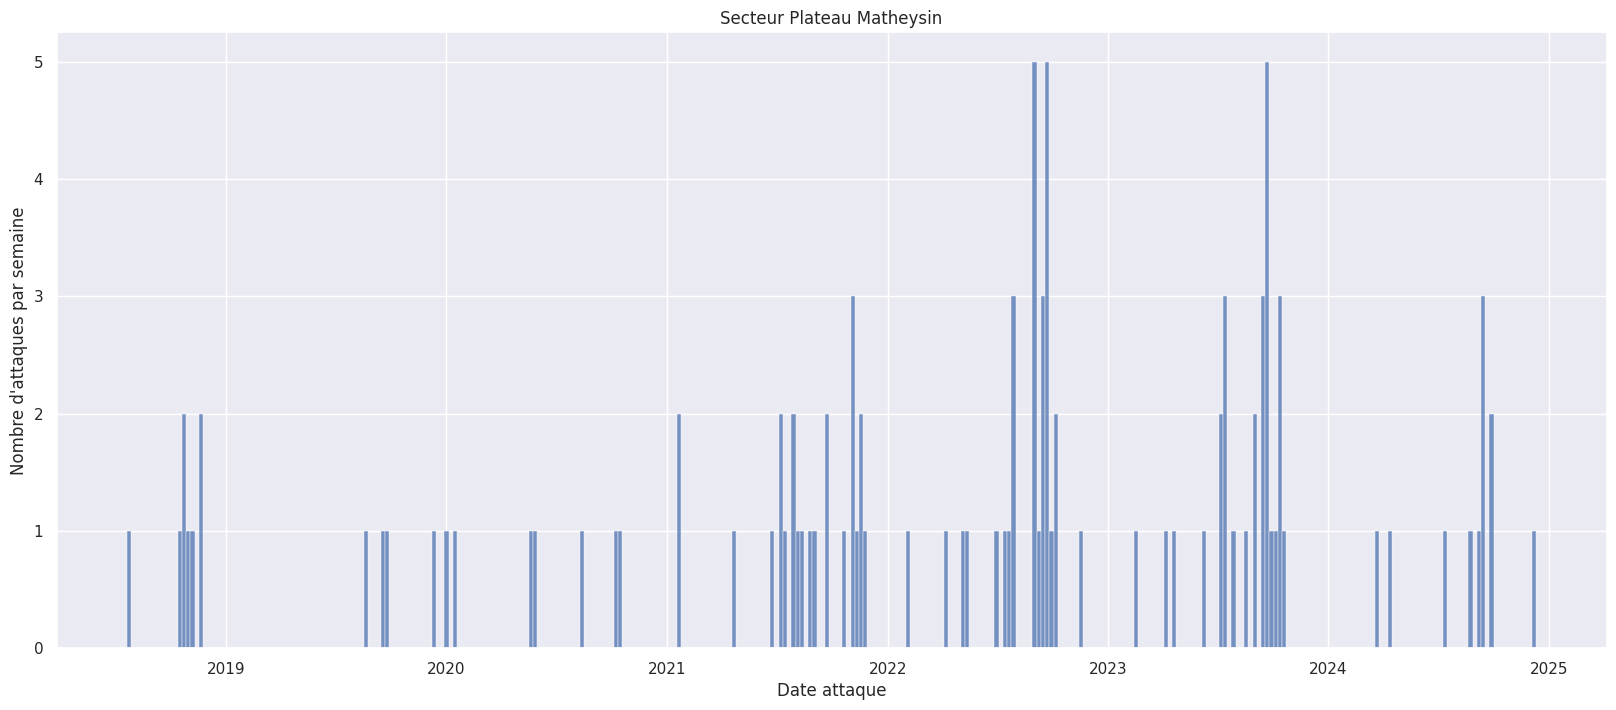

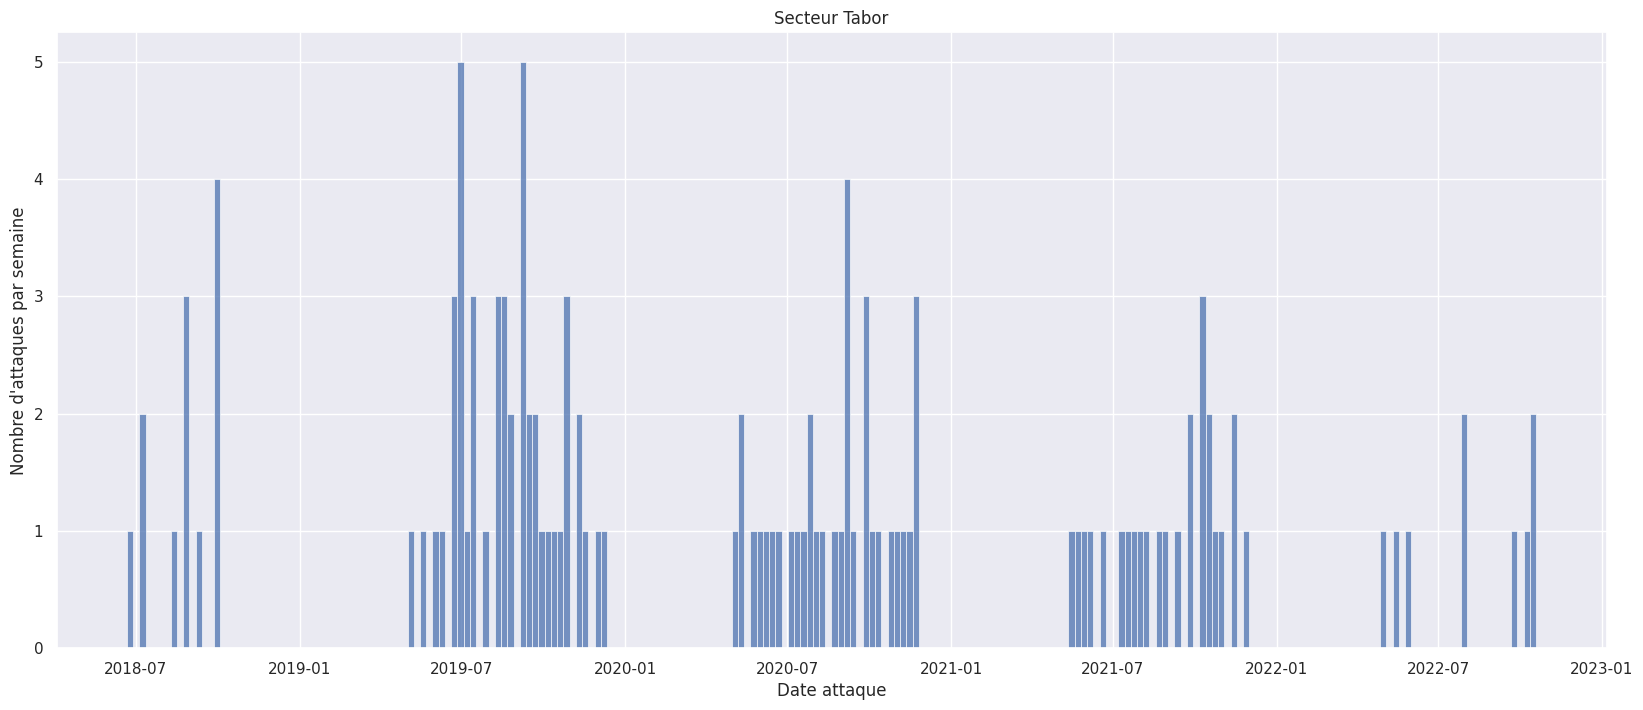

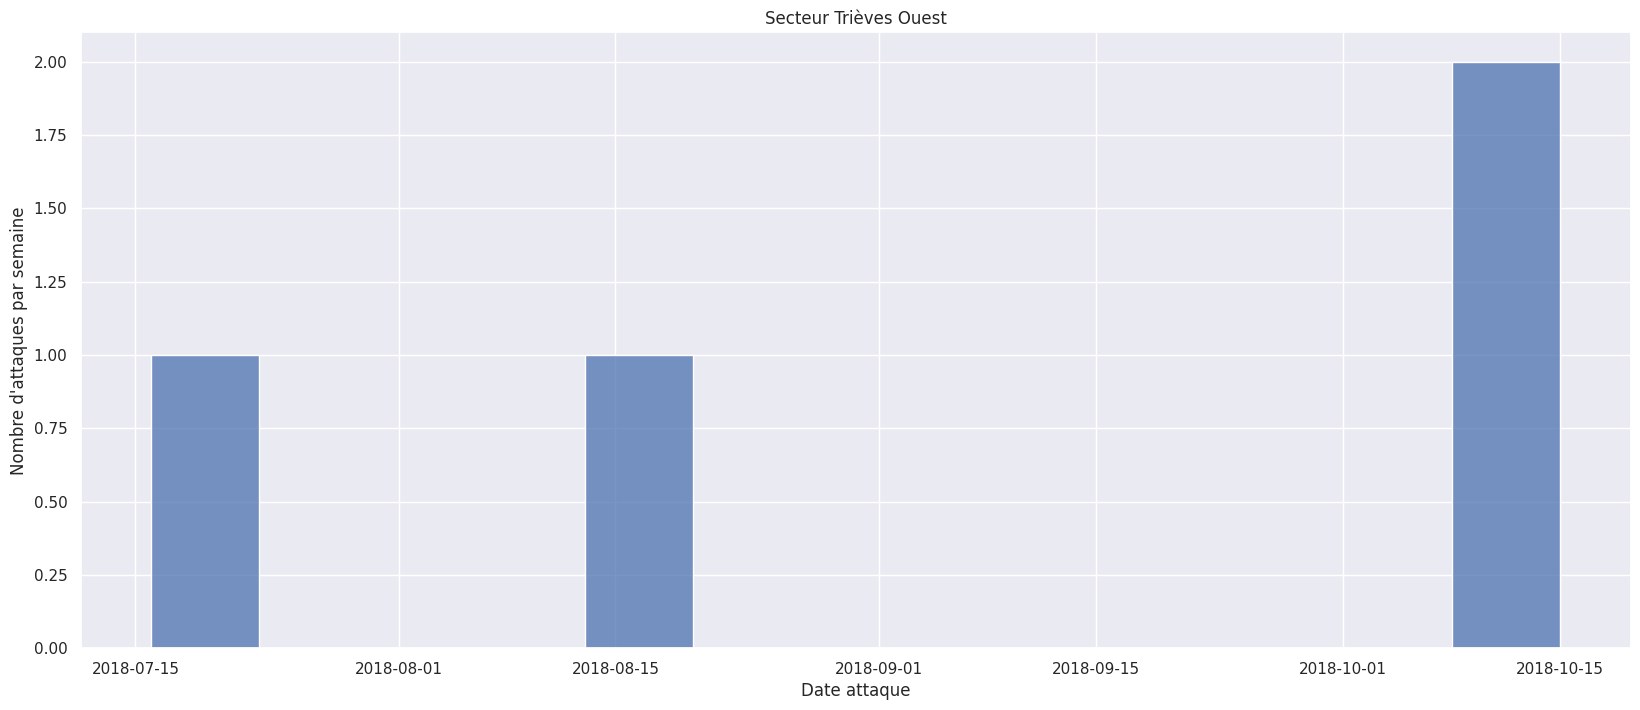

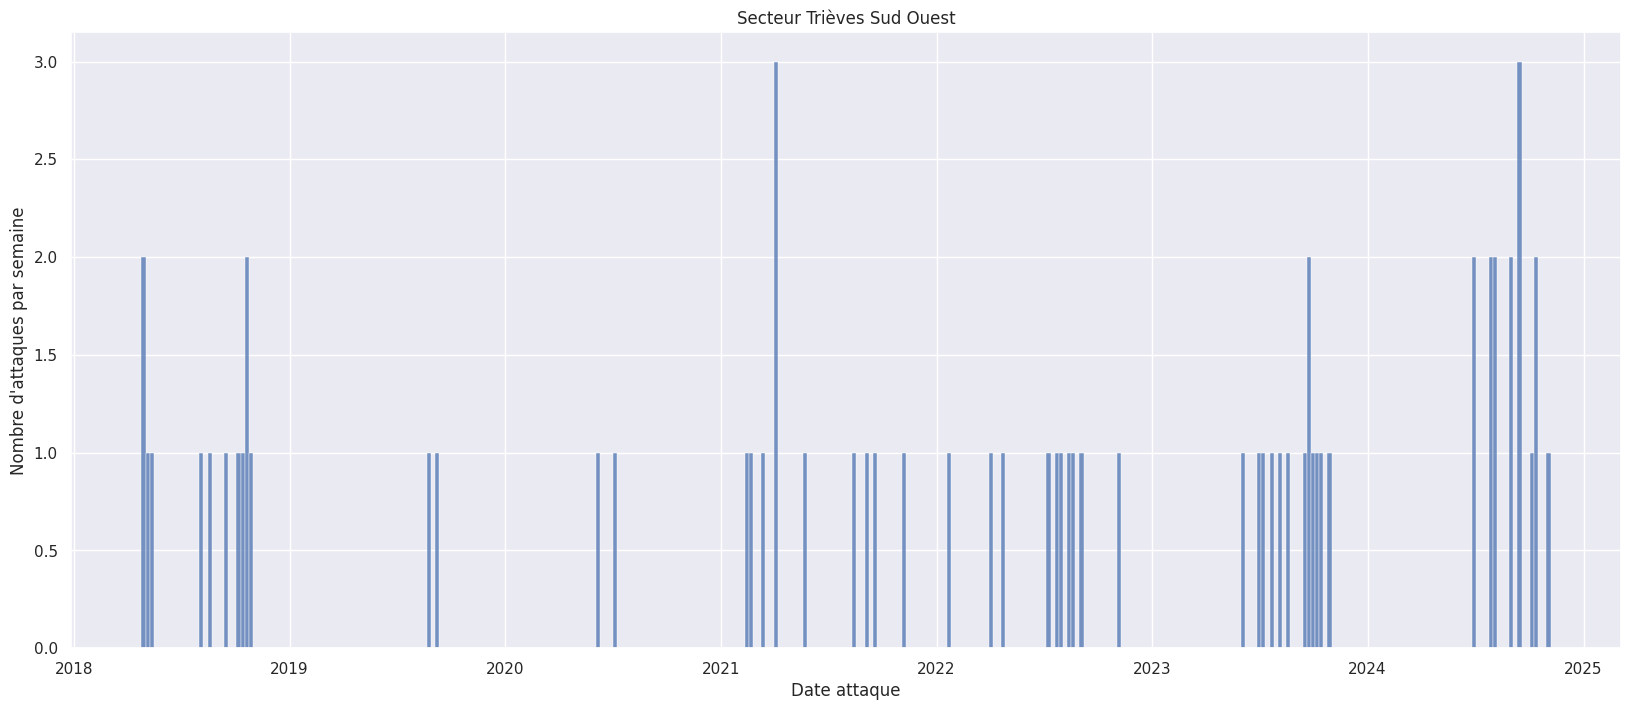

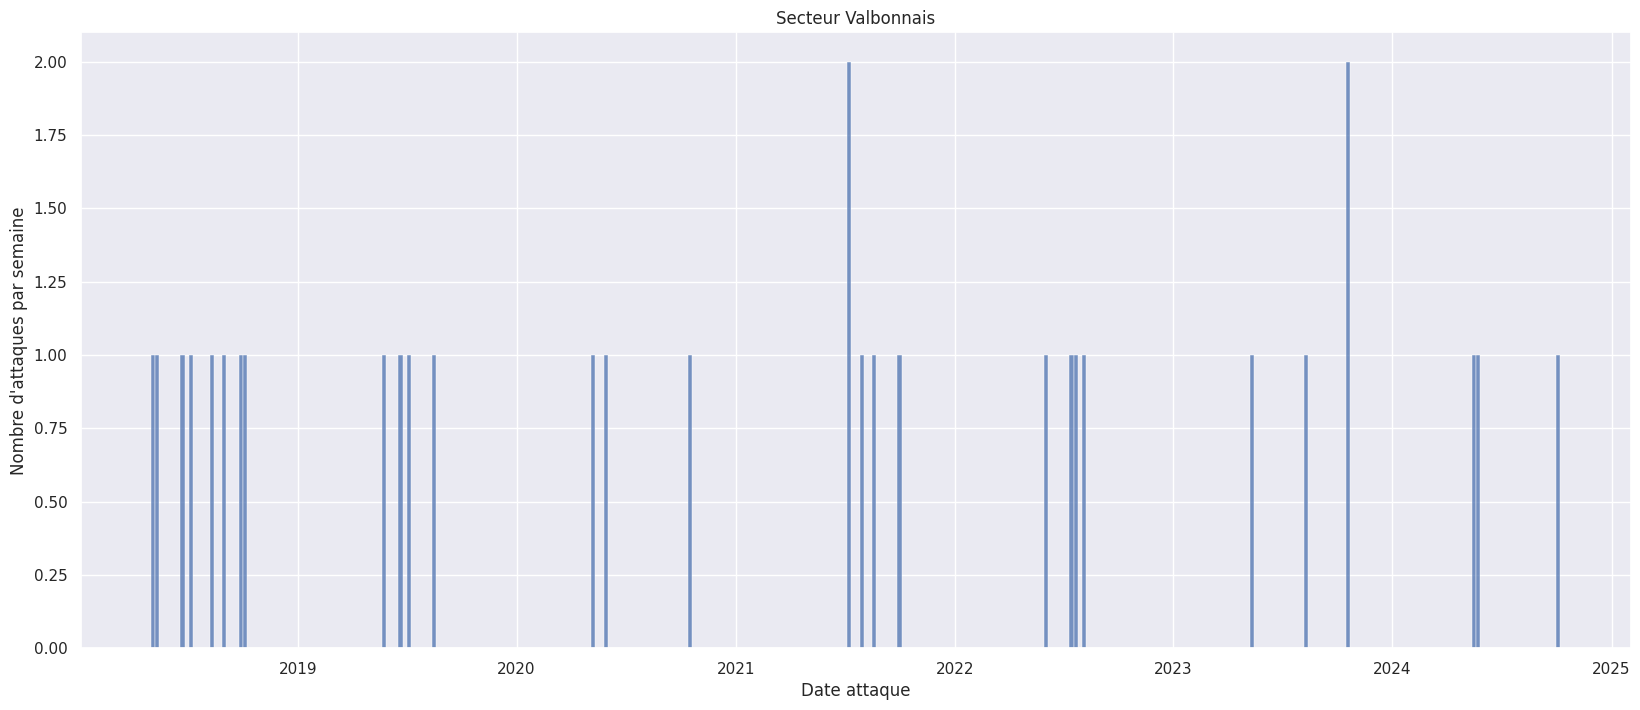

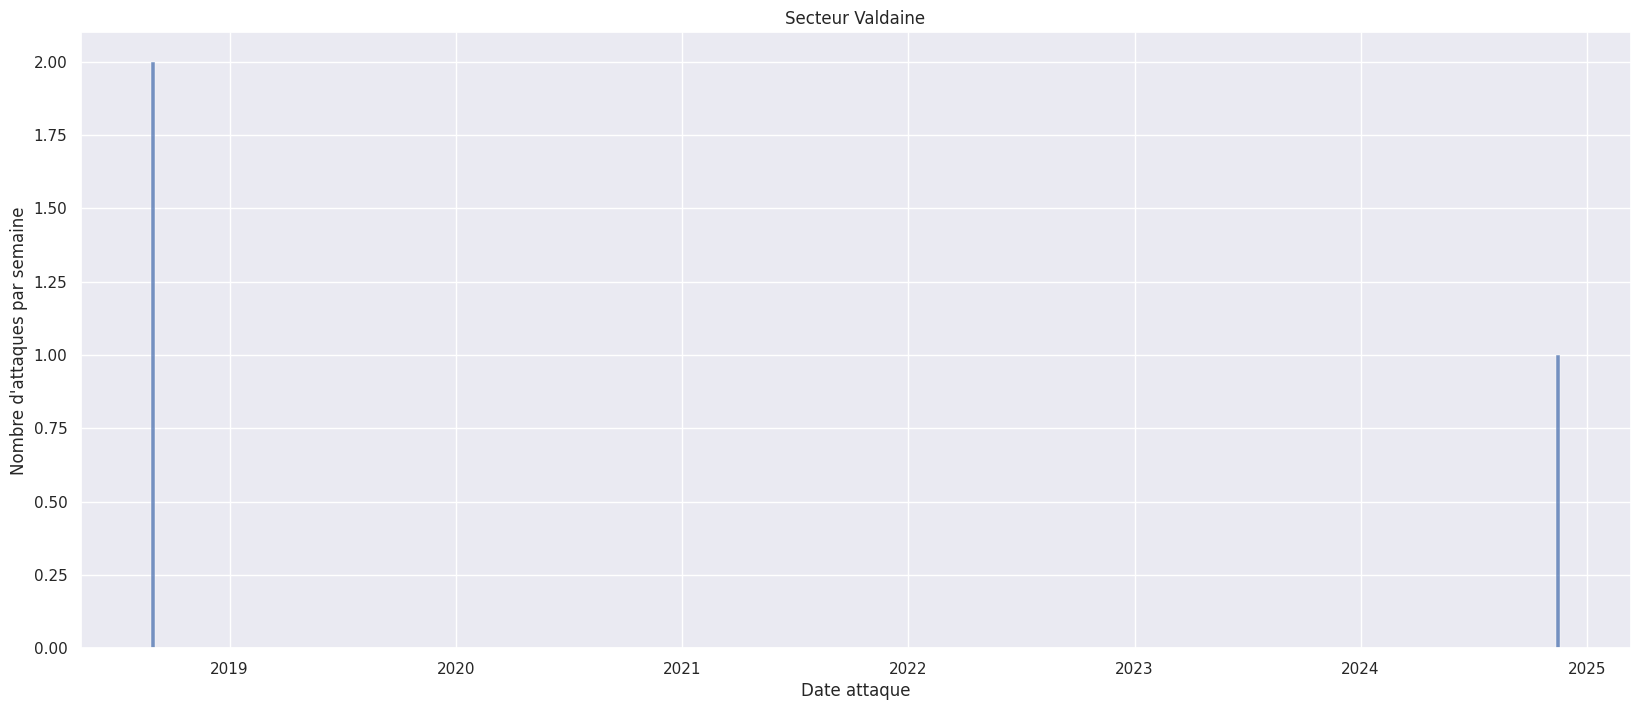

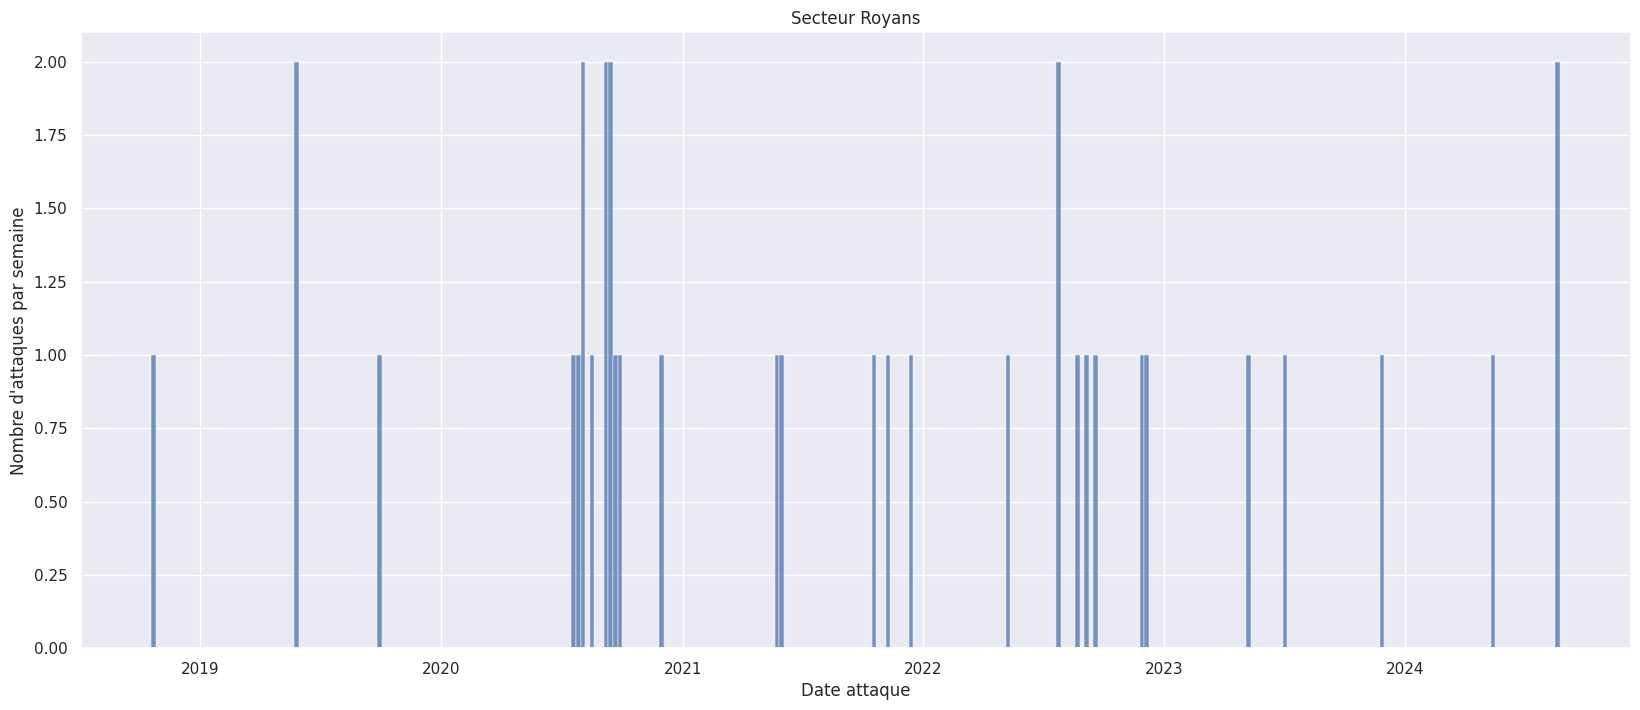

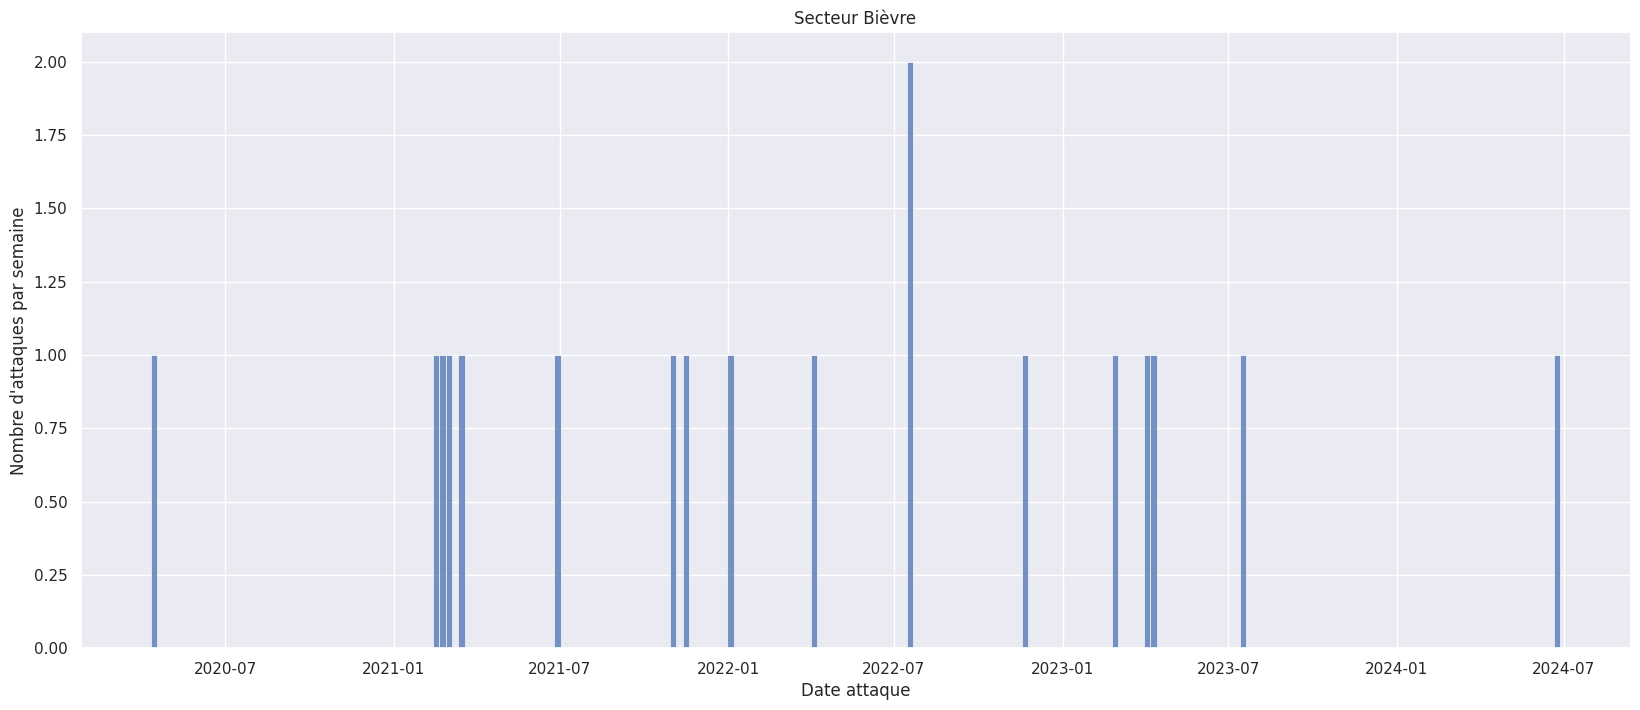

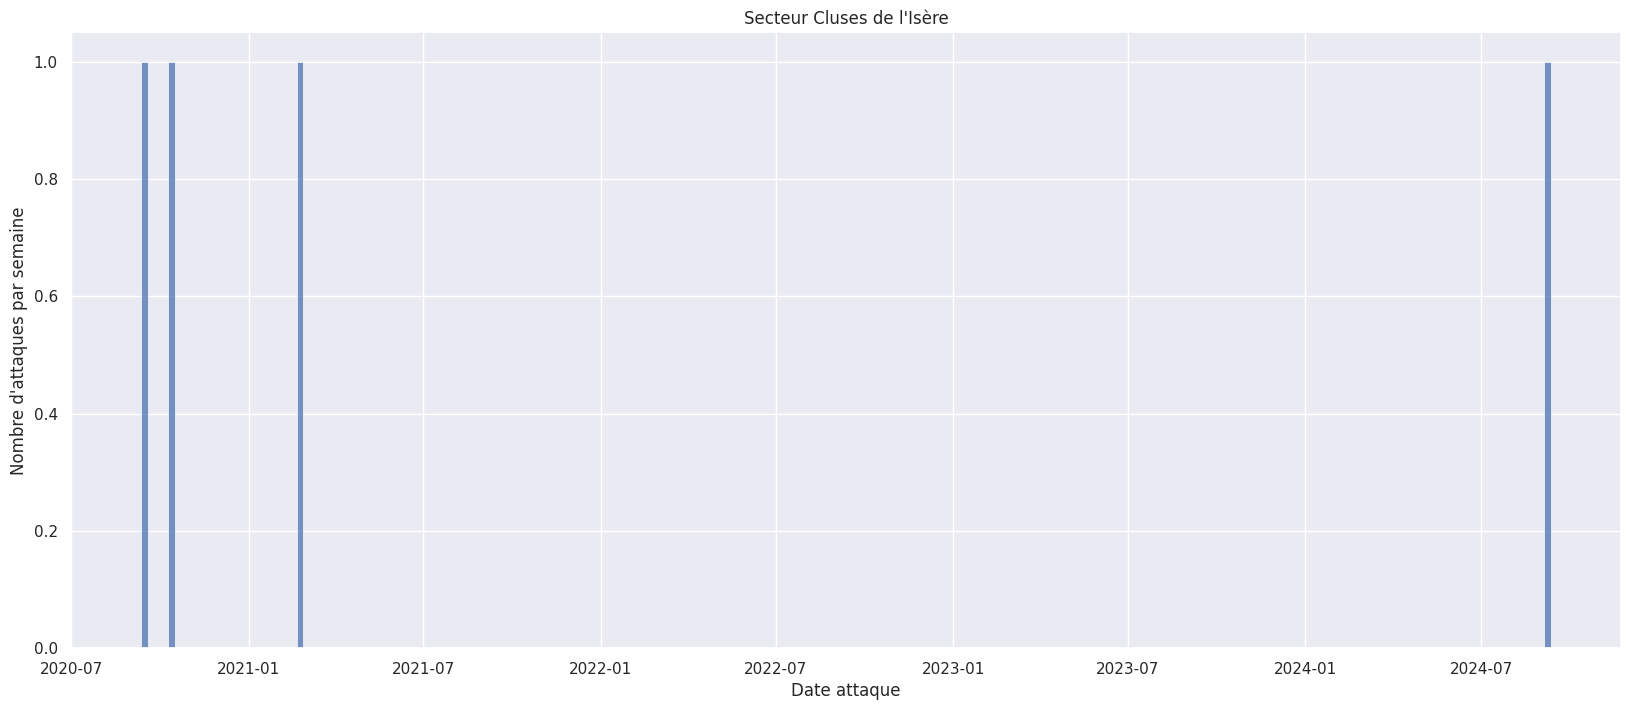

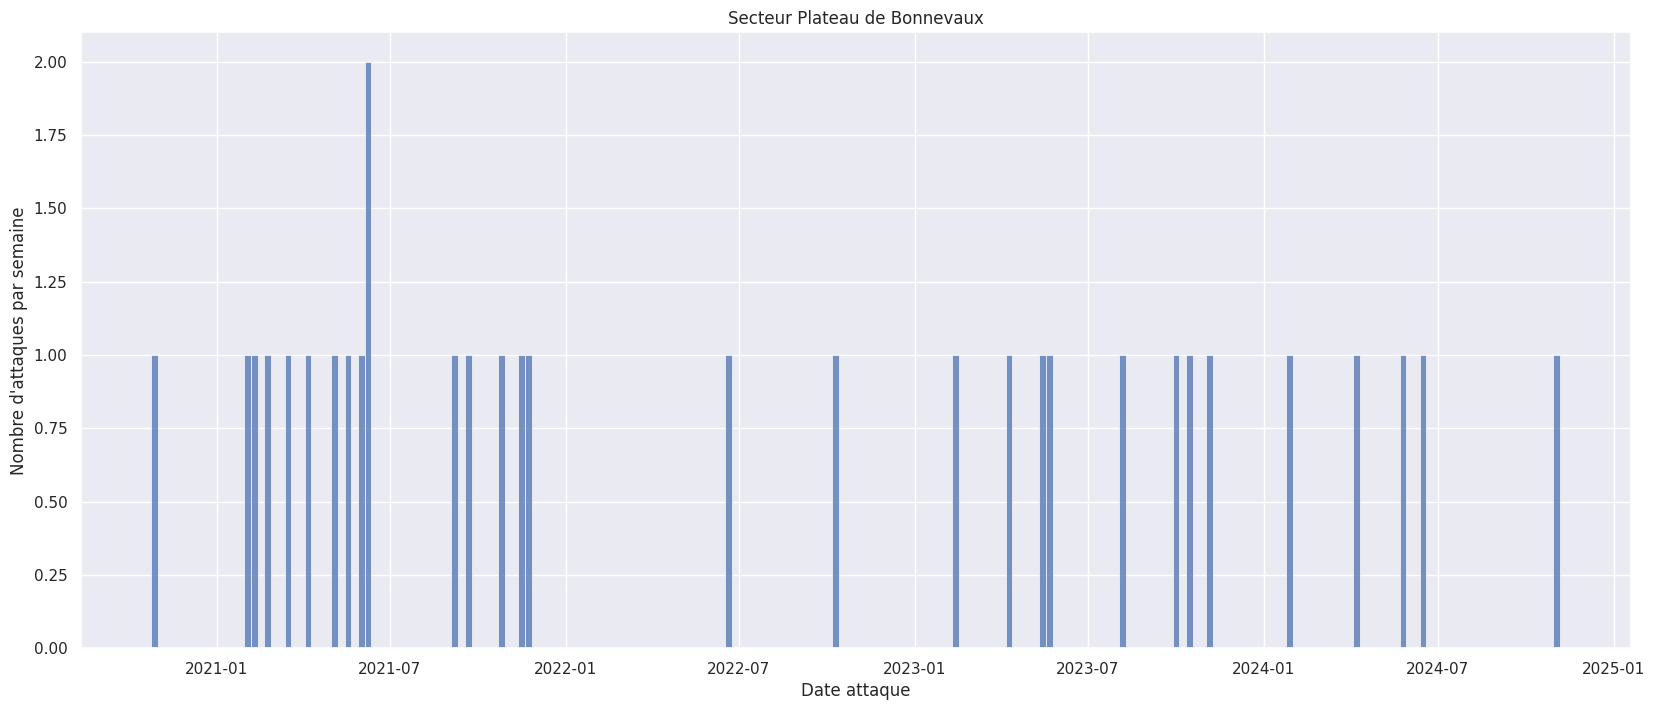

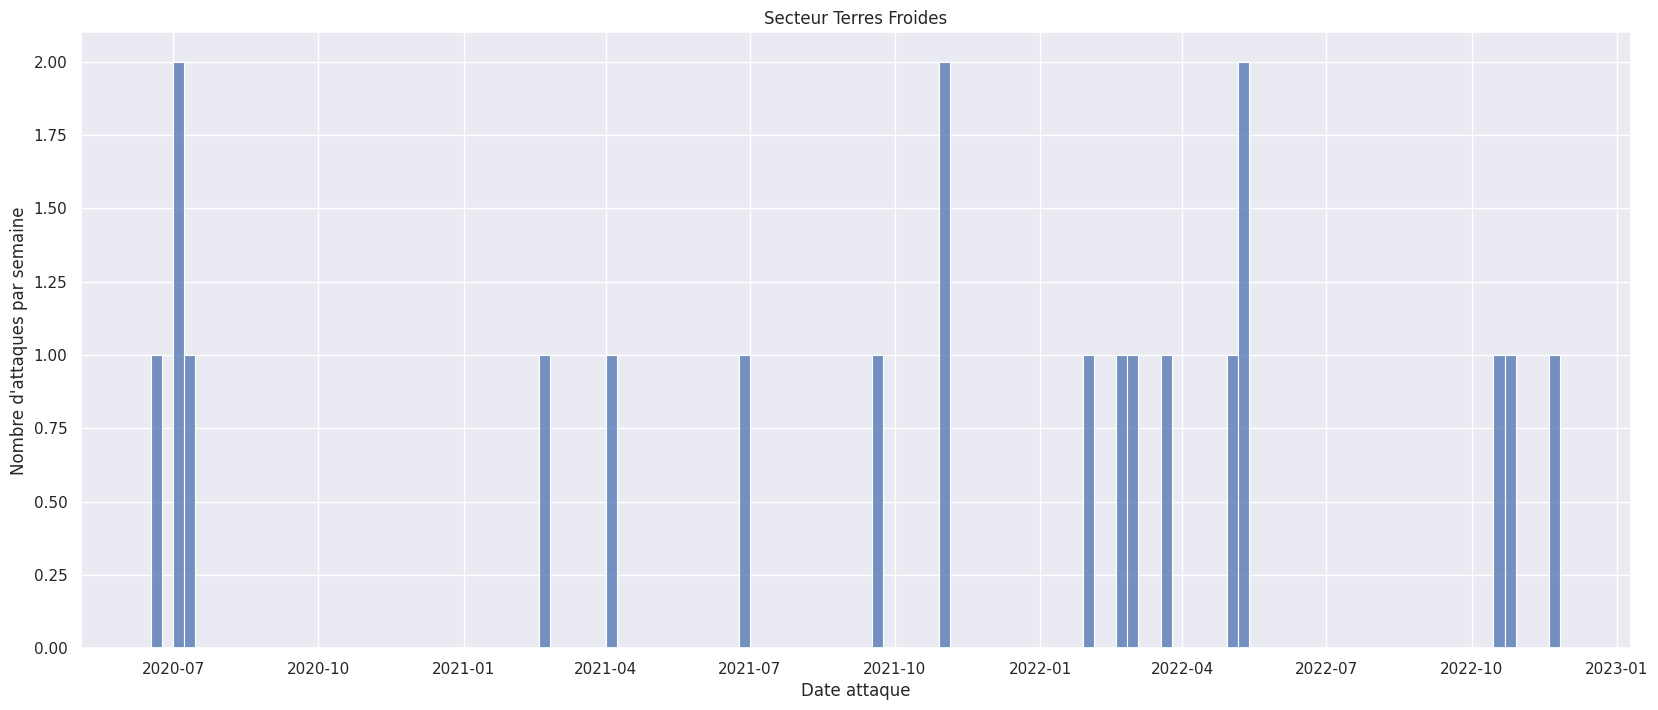

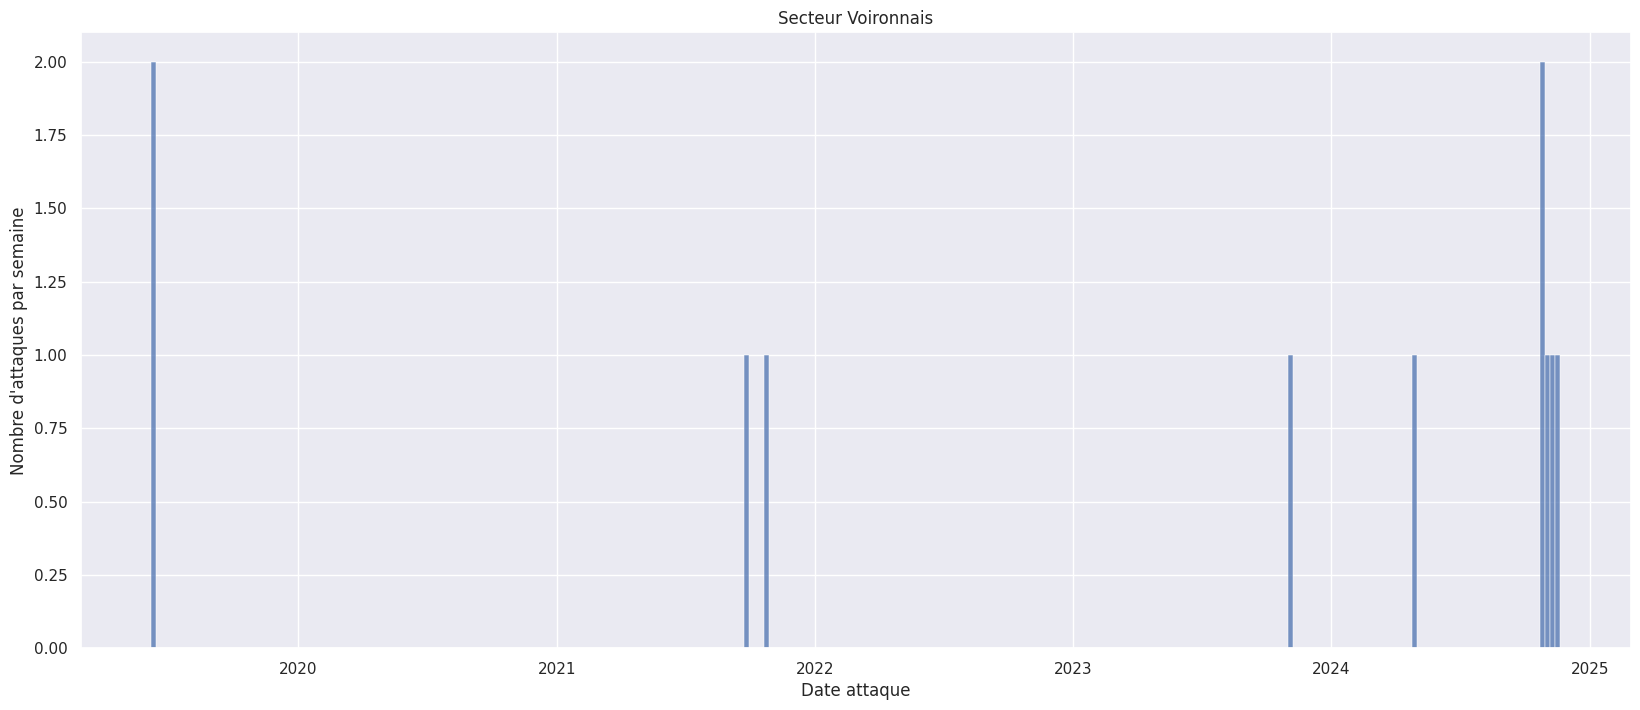

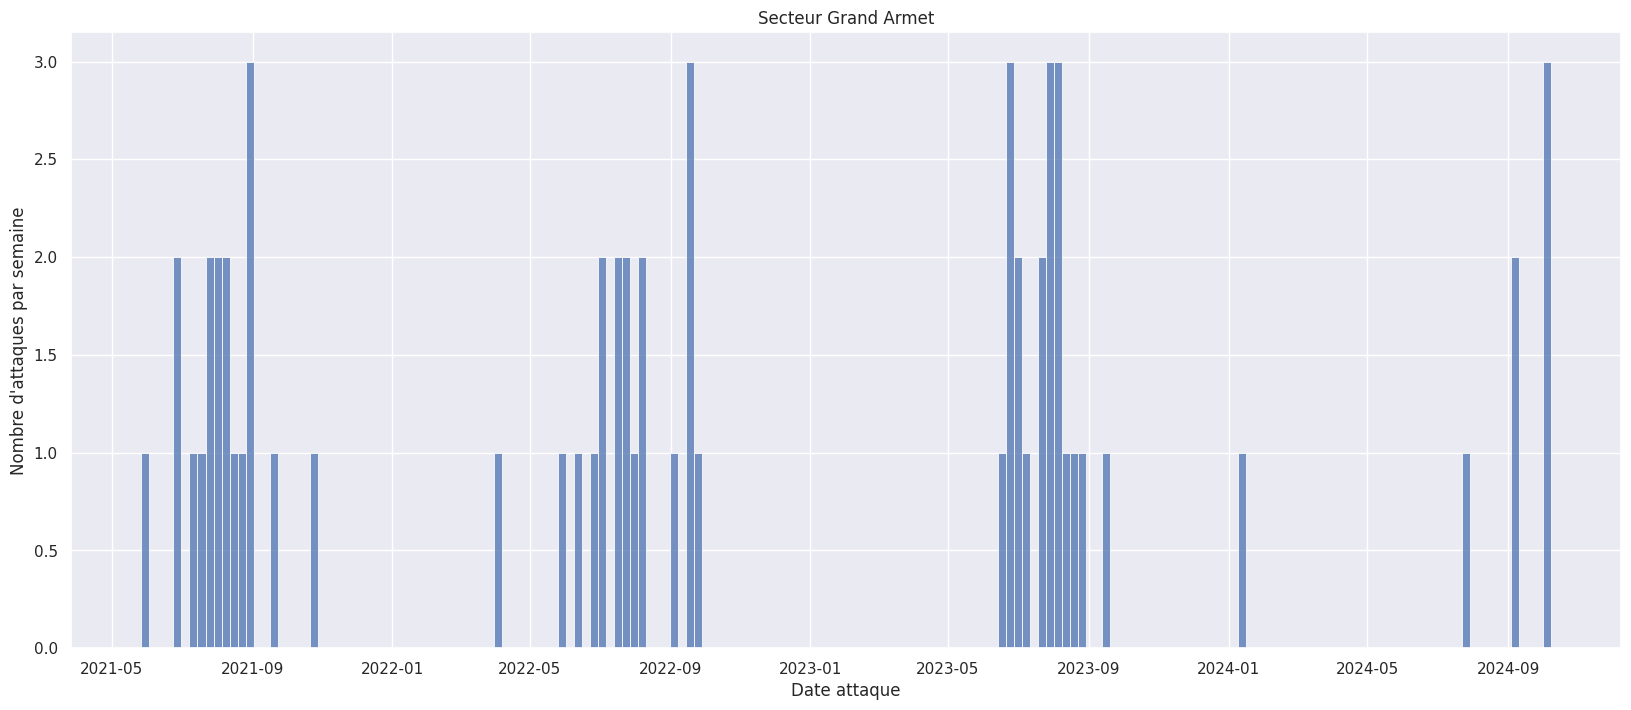

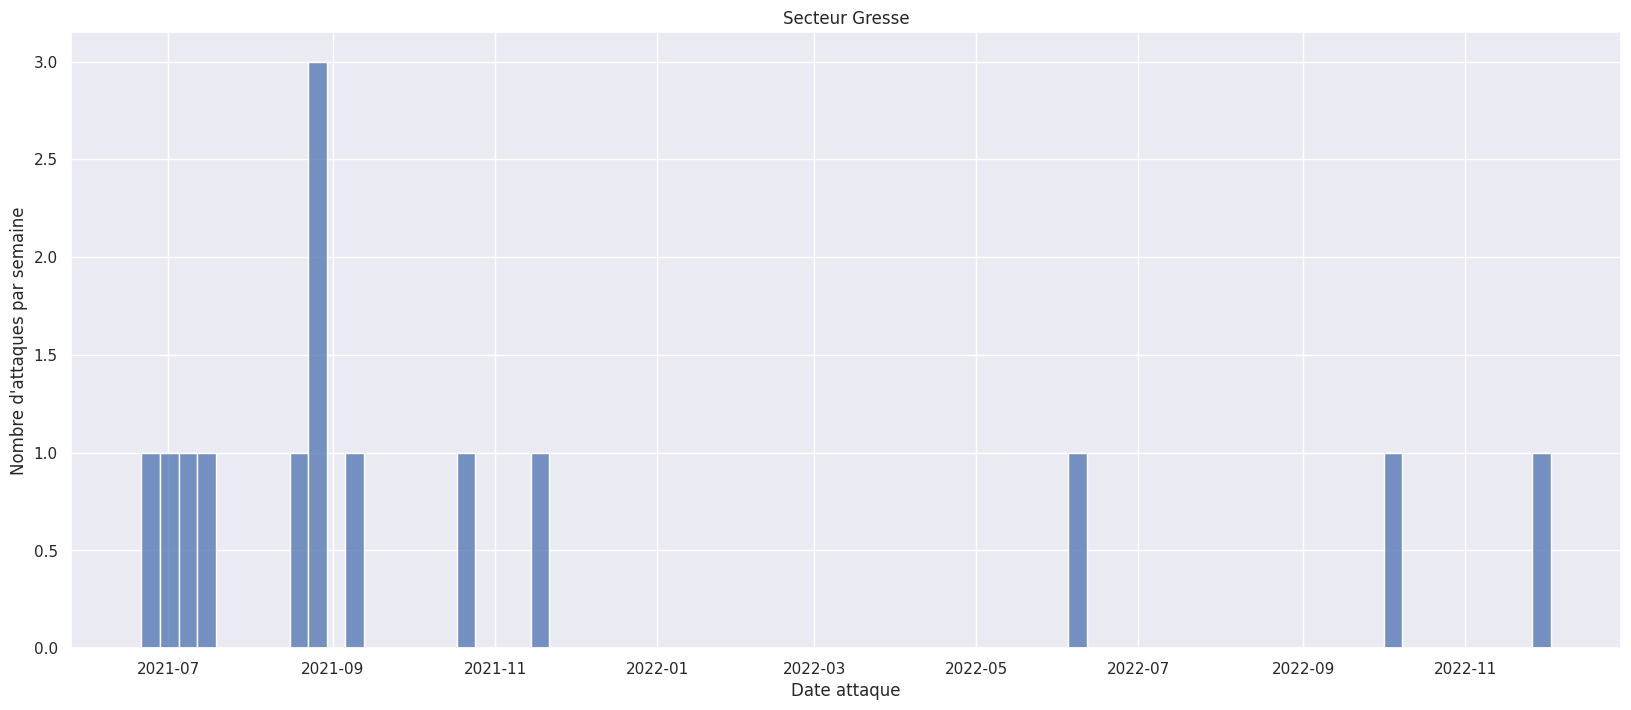

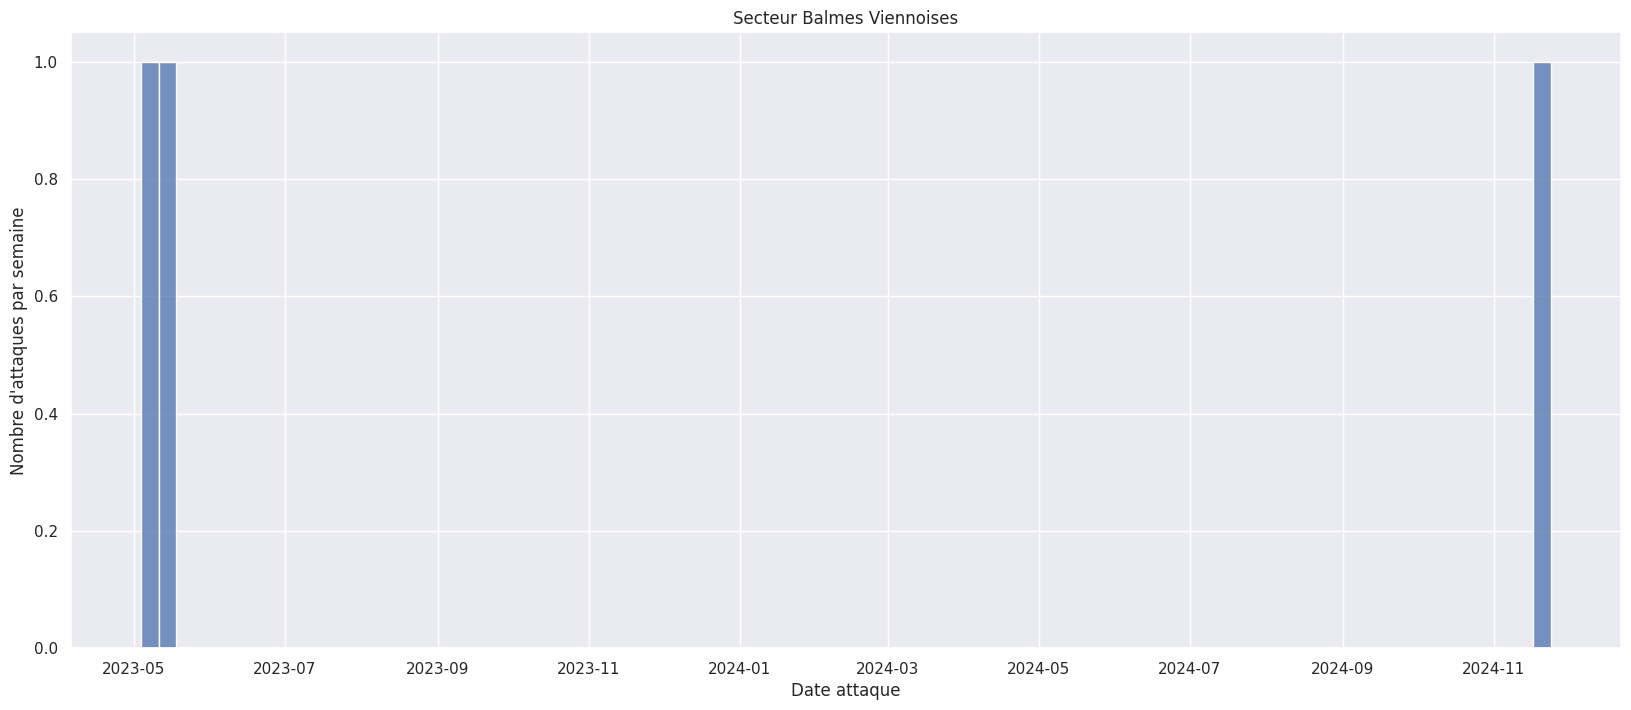

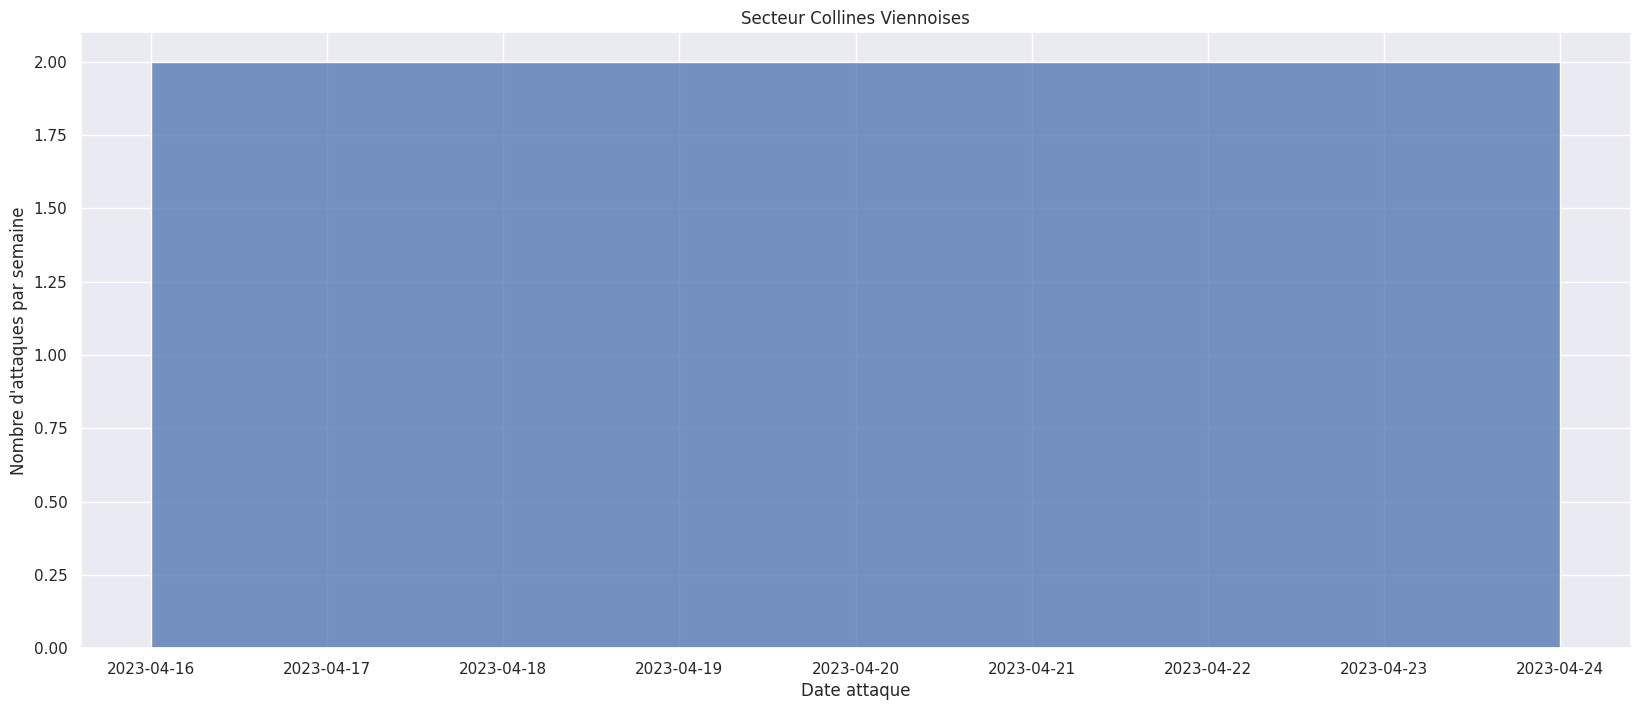

ValueError: `bins` must be positive, when an integer

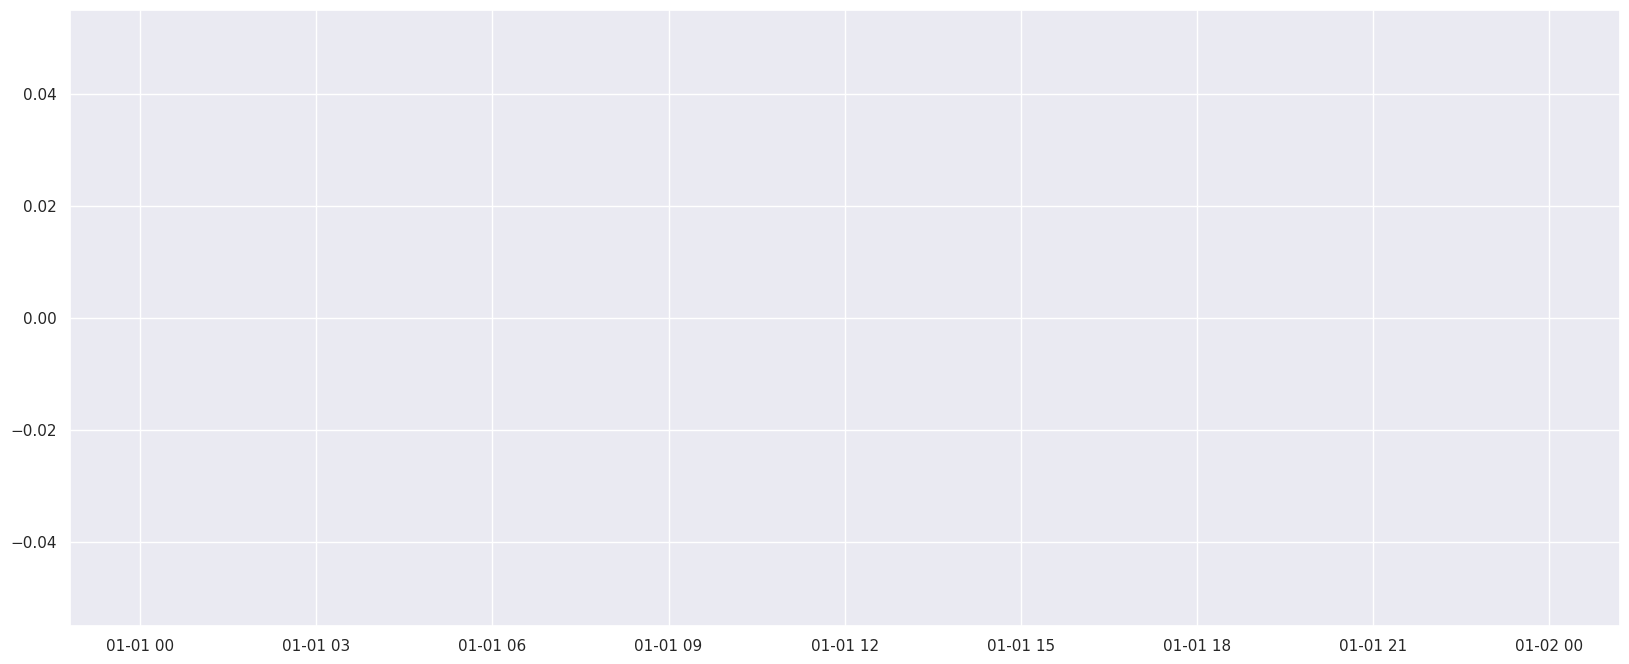

In [35]:
for s in constats_o.Secteur.unique():
    constats_s = constats_o.query(f'Secteur == "{s}" & Année > 2015')
    plt.figure(figsize=(20, 8))
    ax = sns.histplot(data=constats_s, x="Date attaque", binwidth=7).set(
        title=f"Secteur {s}", ylabel="Nombre d'attaques par semaine"
    )
    plt.show()